# Travel Insurance

### Latar Belakang

Asuransi perjalanan adalah jenis asuransi yang memberikan perlindungan selama kita melakukan perjalanan baik di dalam negeri maupun di luar negeri. Beberapa negara bahkan telah mewajibkan para pelancong untuk memiliki asuransi perjalanan, misalnya negara-negara di Eropa dan Amerika. Besarnya premi tergantung dari pertanggungan yang diinginkan, lama perjalanan, dan tujuan perjalanan. Sebuah perusahaan yang bergerak di bidang asuransi perjalanan ingin mengetahui pemegang polis yang akan mengajukan klaim pertanggungan. Data pemegang polis pada perusahaan asuransi merupakan data historis yang terdiri dari tujuan, produk asuransi, dan lain sebagainya.

Target:

- 0 (No)  : Tidak melakukan klaim

- 1 (Yes) : Melakukan klaim

### Perumusan Masalah

Bagaimana melakukan analisis pelanggan menggunakan data (travel insurance) untuk mengidentifikasi dan memprediksi pelanggan yang memiliki risiko tinggi dalam mengajukan klaim?

Ini salah satu contoh risiko pada (travel insurance):
- Jika semakin lama pemegang polis berada di luar negeri, semakin besar kemungkinan mereka menghadapi kejadian yang membutuhkan klaim asuransi, seperti kehilangan bagasi atau kehilangan dokumen penting seperti parpor dll.

- Jika mengalami kecelakaan atau penyakit yang memerlukan perawatan medis selama perjalanan. Biaya medis di luar negeri bisa sangat mahal.

### Tujuan

Untuk memprediksi pelanggan yang akan klaim agar perusahaan dapat menetapkan premi yang sesuai dengan risiko yang terkait dan mengelola (travel insurance) mereka secara efektif.




### Analisis

- Analisis data historis untuk memahami pola dan tren yang ada.
- Melakukan pemrosesan data seperti membersihkan dan mengisi nilai yang hilang, mengkonversi variabel kategorikal menjadi numerik jika diperlukan.
- Memilih fitur-fitur yang paling relevan dalam memprediksi klaim asuransi perjalanan.
- Membagi data menjadi set pelatihan (training set) dan set pengujian (testing set).
- Menggunakan algoritma pembelajaran mesin seperti (decision tree classifier), (random forest classifier) atau algoritma lain yang sesuai untuk melatih model prediksi.
- Melakukan evaluasi model menggunakan (confusion matrix) yang tepat.

### Metric Evaluation

- Type 1 error : False Positive  
Type 1 Error (False Positive): Dalam konteks ini, Type 1 error mengacu pada kasus di mana model memprediksi bahwa seseorang akan melakukan klaim (1/Yes), tetapi pada kenyataannya orang tersebut tidak melakukan klaim (0/No).

- Type 2 error : False Negative  
Type 2 Error (False Negative): Dalam konteks ini, Type 2 error mengacu pada kasus di mana model memprediksi bahwa seseorang tidak akan melakukan klaim (0/No), padahal pada kenyataannya mereka sebenarnya akan melakukan klaim (1/Yes).


## Data Understanding

### Attribute Information

| Attribute | Data Type, Length | Description |
| --- | --- | --- |
| Agency | Object | Name of agency |
| Agency Type | Object | Type of travel insurance agencies |
| Distribution Channel  | Object | Channel of travel insurance agencies|
| Product Name  | Object | Name of the travel insurance products |
| Gender  | Object | Gender of insured |
| Duration  | Int64 | Duration of travel |
| Destination  | Object | Destination of travel |
| Net Sales  | Float64 | Amount of sales of travel insurance policies |
| Commision (in value)  | Float64 |  Commission received for travel insurance agency |
| Age | Int64 | Age of insured |
| Claim | Int64 | Claim status |








In [52]:
# Library

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score, roc_curve

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from category_encoders import BinaryEncoder

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier # bagging
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier # boosting
from sklearn.model_selection import cross_validate, StratifiedKFold
from imblearn.pipeline import Pipeline
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import make_scorer, fbeta_score
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

In [53]:
# Load dataset
df = pd.read_csv('data_travel_insurance.csv')
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No


In [54]:
df['Distribution Channel'].value_counts()

Online     43572
Offline      756
Name: Distribution Channel, dtype: int64

Berdasarkan data yang diberikan, terdapat dua jenis saluran distribusi yang digunakan dalam penjualan asuransi perjalanan, yaitu "Online" dan "Offline". Berikut adalah kesimpulan dari data tersebut:

1. Saluran distribusi "Online" merupakan saluran yang paling umum digunakan dalam penjualan asuransi perjalanan, dengan total 43.572 entri dalam dataset.
2. Saluran distribusi "Offline" digunakan dalam jumlah yang jauh lebih sedikit, hanya terdapat 756 entri dalam dataset.

Kesimpulan ini menunjukkan bahwa sebagian besar penjualan asuransi perjalanan dilakukan secara online. Hal ini dapat menunjukkan adanya tren yang menunjukkan bahwa lebih banyak konsumen memilih untuk membeli asuransi perjalanan secara online daripada melalui saluran distribusi offline. Ini bisa disebabkan oleh kemudahan akses, kenyamanan, dan penawaran yang tersedia dalam saluran distribusi online.

Analisis lebih lanjut dapat dilakukan untuk membandingkan performa penjualan antara saluran distribusi online dan offline, termasuk dalam hal volume penjualan, nilai penjualan, dan tingkat klaim asuransi. Informasi ini dapat memberikan wawasan lebih lanjut tentang preferensi konsumen dan efektivitas saluran distribusi dalam industri asuransi perjalanan.

In [55]:
display(df.describe(), df.describe(include='object'))

,Duration,Net Sales,Commision (in value),Age
count,44328.000000,44328.000000,44328.000000,44328.000000
mean,49.424292,40.550948,9.707692,39.925600
std,109.153961,48.661970,19.625637,13.954926
min,-1.000000,-357.500000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.500000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


,Agency,Agency Type,Distribution Channel,Product Name,Gender,Destination,Claim
count,44328,44328,44328,44328,12681,44328,44328
unique,16,2,2,26,2,138,2
top,EPX,Travel Agency,Online,Cancellation Plan,M,SINGAPORE,No
freq,24656,32113,43572,12979,6504,9267,43651


Berdasarkan data yang diberikan, kita dapat menarik beberapa kesimpulan sebagai berikut:

1. Durasi (Duration): Rata-rata durasi pemesanan adalah sekitar 49,42. Namun, nilai maksimum yang mencolok adalah 4881, yang menunjukkan adanya outlier dalam data ini. Standar deviasi yang tinggi (109,15) juga menunjukkan variasi yang besar dalam durasi pemesanan.

2. Penjualan Bersih (Net Sales): Rata-rata penjualan bersih adalah sekitar 40,55. Namun, nilai negatif terkecil (-357,5) menunjukkan adanya kasus pengembalian atau pembatalan yang menghasilkan kerugian. Nilai maksimum (810) menunjukkan adanya transaksi dengan penjualan yang tinggi.

3. Komisi (Commision): Rata-rata komisi yang diperoleh adalah sekitar 9,71. Standar deviasi (19,63) yang tinggi menunjukkan variasi yang besar dalam jumlah komisi yang diperoleh.

4. Usia (Age): Rata-rata usia pelanggan adalah sekitar 39,93 tahun. Standar deviasi yang rendah (13,95) menunjukkan bahwa data usia cenderung tersebar secara merata di sekitar nilai rata-rata.

5. Agensi (Agency): Terdapat 16 agensi yang berbeda dalam data ini. Agensi terbanyak adalah EPX dengan frekuensi kemunculan sebanyak 24.656 kali.

6. Jenis Agensi (Agency Type): Terdapat dua jenis agensi dalam data ini, yaitu "Travel Agency" dan "Online". Mayoritas agensi adalah "Travel Agency" dengan frekuensi kemunculan sebanyak 32.113 kali.

7. Saluran Distribusi (Distribution Channel): Terdapat dua saluran distribusi dalam data ini, yaitu "Online" dan "Offline". Mayoritas saluran distribusi adalah "Online" dengan frekuensi kemunculan sebanyak 43.572 kali.

8. Nama Produk (Product Name): Terdapat 26 produk yang berbeda dalam data ini. Produk yang paling sering muncul adalah "Cancellation Plan" dengan frekuensi kemunculan sebanyak 12.979 kali.

9. Jenis Kelamin (Gender): Data jenis kelamin hanya tersedia untuk sebagian kecil pelanggan (12.681 data). Dalam data ini, pelanggan pria (M) lebih banyak dibandingkan pelanggan wanita (F).

10. Tujuan (Destination): Terdapat 138 tujuan yang berbeda dalam data ini. Tujuan yang paling sering muncul adalah "SINGAPORE" dengan frekuensi kemunculan sebanyak 9.267 kali.

11. Klaim (Claim): Mayoritas pelanggan (43.651 dari 44.328) tidak mengajukan klaim asuransi perjalanan (No).

## Data Cleaning

Ada data yang hilang/kosong dibeberapa fitur/kolom, kemudian fitur/kolom enrolle_id tidak berguna untuk analisis dan modeling, maka kita akan memperbaiki semua datanya dan membuatnya menjadi siap pakai untuk melakukan analisa terhadap masalahnya dan juga pembuatan model machine learningnya.

In [56]:
# Cek info lebih detail untuk setiap fitur
listItem = []

for col in df.columns:
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col]))*100, 2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

df_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Agency,object,0,0.00,16,"[RAB, JWT]"
1,Agency Type,object,0,0.00,2,"[Travel Agency, Airlines]"
2,Distribution Channel,object,0,0.00,2,"[Offline, Online]"
3,Product Name,object,0,0.00,26,"[Annual Silver Plan, Gold Plan]"
4,Gender,object,31647,71.39,2,"[F, nan]"
5,Duration,int64,0,0.00,437,"[95, 318]"
6,Destination,object,0,0.00,138,"[NORWAY, GREECE]"
7,Net Sales,float64,0,0.00,1006,"[14.11, 5.75]"
8,Commision (in value),float64,0,0.00,915,"[12.54, 2.87]"
9,Age,int64,0,0.00,89,"[58, 9]"


Berdasarkan informasi yang diberikan, kita dapat mengambil beberapa kesimpulan mengenai setiap fitur dalam dataset:

1. Agency:
   - Tipe data: String (object)
   - Tidak ada nilai null dalam kolom ini.
   - Terdapat 16 nilai unik.
   - Contoh dua nilai unik yang dipilih secara acak: [LWC, TST]

2. Agency Type:
   - Tipe data: String (object)
   - Tidak ada nilai null dalam kolom ini.
   - Terdapat 2 nilai unik.
   - Contoh dua nilai unik yang dipilih secara acak: [Travel Agency, Airlines]

3. Distribution Channel:
   - Tipe data: String (object)
   - Tidak ada nilai null dalam kolom ini.
   - Terdapat 2 nilai unik.
   - Contoh dua nilai unik yang dipilih secara acak: [Offline, Online]

4. Product Name:
   - Tipe data: String (object)
   - Tidak ada nilai null dalam kolom ini.
   - Terdapat 26 nilai unik.
   - Contoh dua nilai unik yang dipilih secara acak: [Gold Plan, Annual Travel Protect Gold]

5. Gender:
   - Tipe data: String (object)
   - Terdapat 31,647 nilai null dalam kolom ini, yang merupakan sekitar 71.39% dari total data.
   - Terdapat 2 nilai unik.
   - Contoh dua nilai unik yang dipilih secara acak: [NaN (missing value), F]

6. Duration:
   - Tipe data: Integer (int64)
   - Tidak ada nilai null dalam kolom ini.
   - Terdapat 437 nilai unik.
   - Contoh dua nilai unik yang dipilih secara acak: [135, 125]

7. Destination:
   - Tipe data: String (object)
   - Tidak ada nilai null dalam kolom ini.
   - Terdapat 138 nilai unik.
   - Contoh dua nilai unik yang dipilih secara acak: [TRINIDAD AND TOBAGO, SENEGAL]

8. Net Sales:
   - Tipe data: Floating-point (float64)
   - Tidak ada nilai null dalam kolom ini.
   - Terdapat 1,006 nilai unik.
   - Contoh dua nilai unik yang dipilih secara acak: [182.4, 158.4]

9. Commision (in value):
   - Tipe data: Floating-point (float64)
   - Tidak ada nilai null dalam kolom ini.
   - Terdapat 915 nilai unik.
   - Contoh dua nilai unik yang dipilih secara acak: [37.13, 0.54]

10. Age:
    - Tipe data: Integer (int64)
    - Tidak ada nilai null dalam kolom ini.
    - Terdapat 89 nilai unik.
    - Contoh dua nilai unik yang dipilih secara acak: [53, 36]

11. Claim:
    - Tipe data: String (object)
    - Tidak ada nilai null dalam kolom ini.
    - Terdapat 2 nilai unik.
    - Contoh dua nilai unik yang dipilih secara acak: [No, Yes]

Kesimpulan umum:
- Dataset ini terdiri dari 11 fitur dengan tipe data yang berbeda, termasuk objek, integer, dan float.
- Fitur "Gender" memiliki persent

In [57]:
df['Duration'].unique()

array([ 365,    4,   19,   20,    8,    2,   25,   90,   24,   43,  103,
        376,    6,   16,   27,   34,    3,   14,   12,   31,    5,    7,
         56,   29,   30,   58,    9,   38,   42,   11,   13,   40,   79,
        370,  366,   26,   83,   55,   18,  100,    1,   35,   36,   75,
         23,   73,   32,  232,   37,   10, 4736,   15,   17,   99,  173,
         74,   82,   66,  156,   39,   95,   98,  111,  430,   53,   77,
         87,   70,  151,   45,   54,  114,  118,   62,   28,  112,  326,
         22,   59,   44,   21,   97,   63,   60,   51,  180,  160,  368,
         65,   93,   71,   57,    0,   76,   69,  110,  146,  116,  129,
         84,   33,  149,   68,   64,  101,  145,   88,  222,  176,  165,
        169,  387,   49,  109,   41,  381,   50,  161,  154,  330,   46,
         78,   47,  121,  106,  140,   91,  104,  134,  393,  282,  123,
        172,   86,  102,  314,  386,  383,   81,  283,  115,  144,   61,
        206,  213,  271,  174,  152,  122,   94,  2

Berdasarkan data yang diberikan, terdapat beberapa kesimpulan yang dapat diambil:

1. Durasi perjalanan memiliki rentang nilai yang cukup bervariasi, mulai dari nilai negatif hingga ribuan. Ini menunjukkan bahwa durasi perjalanan bisa mencakup rentang waktu yang sangat beragam.

2. Terdapat beberapa nilai yang tidak wajar atau tidak masuk akal dalam data, seperti nilai -1 dan 4736. Nilai-nilai ini mungkin merupakan kesalahan penginputan atau outliers dalam data.

3. Sebagian besar durasi perjalanan berada dalam rentang nilai yang wajar, seperti beberapa hari (4, 8, 19, 20, 25, 30, dsb.), beberapa minggu (42, 56, 70, dsb.), beberapa bulan (90, 180, dsb.), atau setahun (365).

4. Terdapat beberapa nilai yang mungkin memiliki interpretasi khusus, seperti durasi perjalanan 0. Hal ini bisa menunjukkan perjalanan dengan durasi yang sangat singkat atau mungkin perjalanan lokal yang tidak memerlukan waktu yang signifikan.

5. Terdapat beberapa nilai yang mencurigakan atau tidak umum, seperti durasi perjalanan yang sangat panjang (misalnya 4580, 4685, dsb.). Nilai-nilai ini bisa jadi kesalahan penginputan atau kasus-kasus yang jarang terjadi.

Dalam kesimpulan ini, penting untuk melakukan pemeriksaan lebih lanjut terhadap data yang mencurigakan atau tidak wajar untuk memastikan keakuratannya.

<Figure size 1000x800 with 0 Axes>

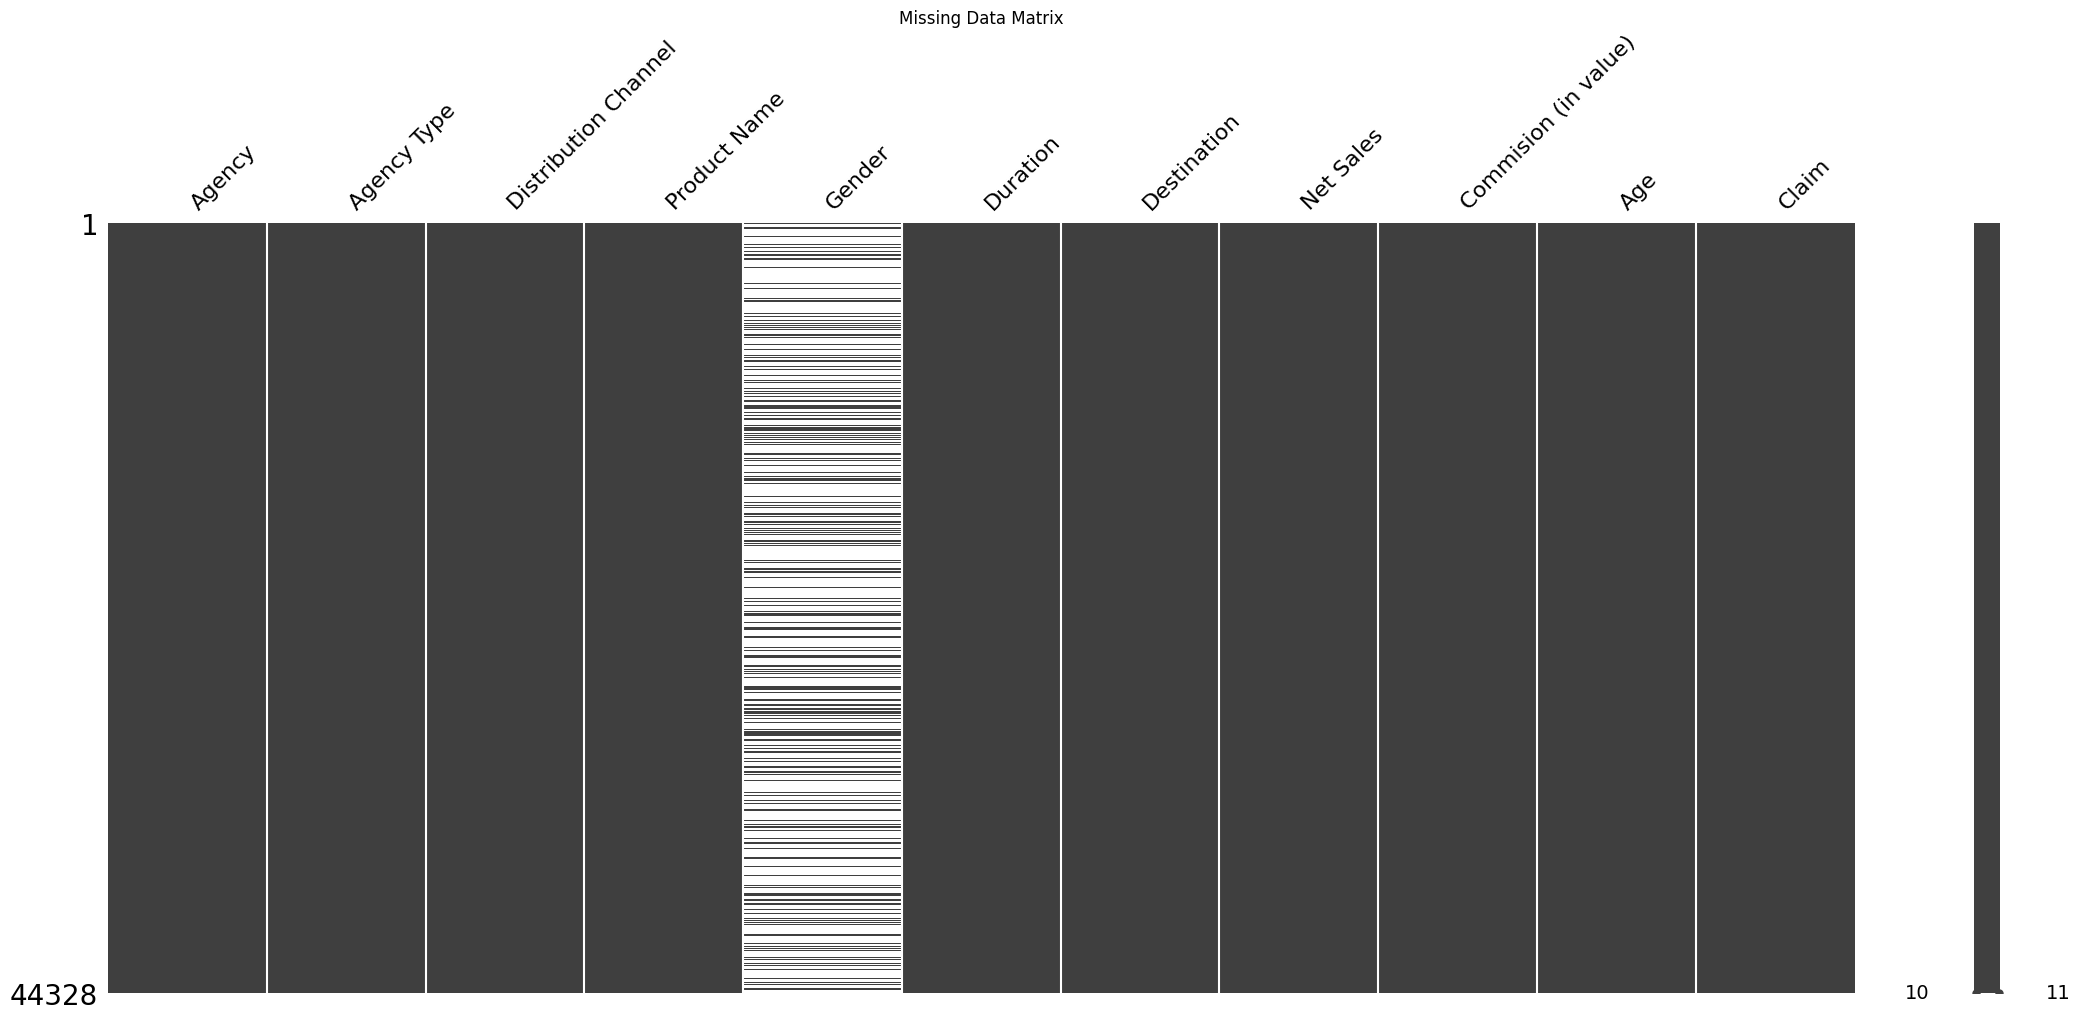

In [58]:
import missingno as msno
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
msno.matrix(df)
plt.title("Missing Data Matrix")
plt.show()


                      Duration  Net Sales  Commision (in value)       Age
Duration              1.000000   0.392636              0.315283  0.005042
Net Sales             0.392636   1.000000              0.647442  0.039393
Commision (in value)  0.315283   0.647442              1.000000  0.118546
Age                   0.005042   0.039393              0.118546  1.000000


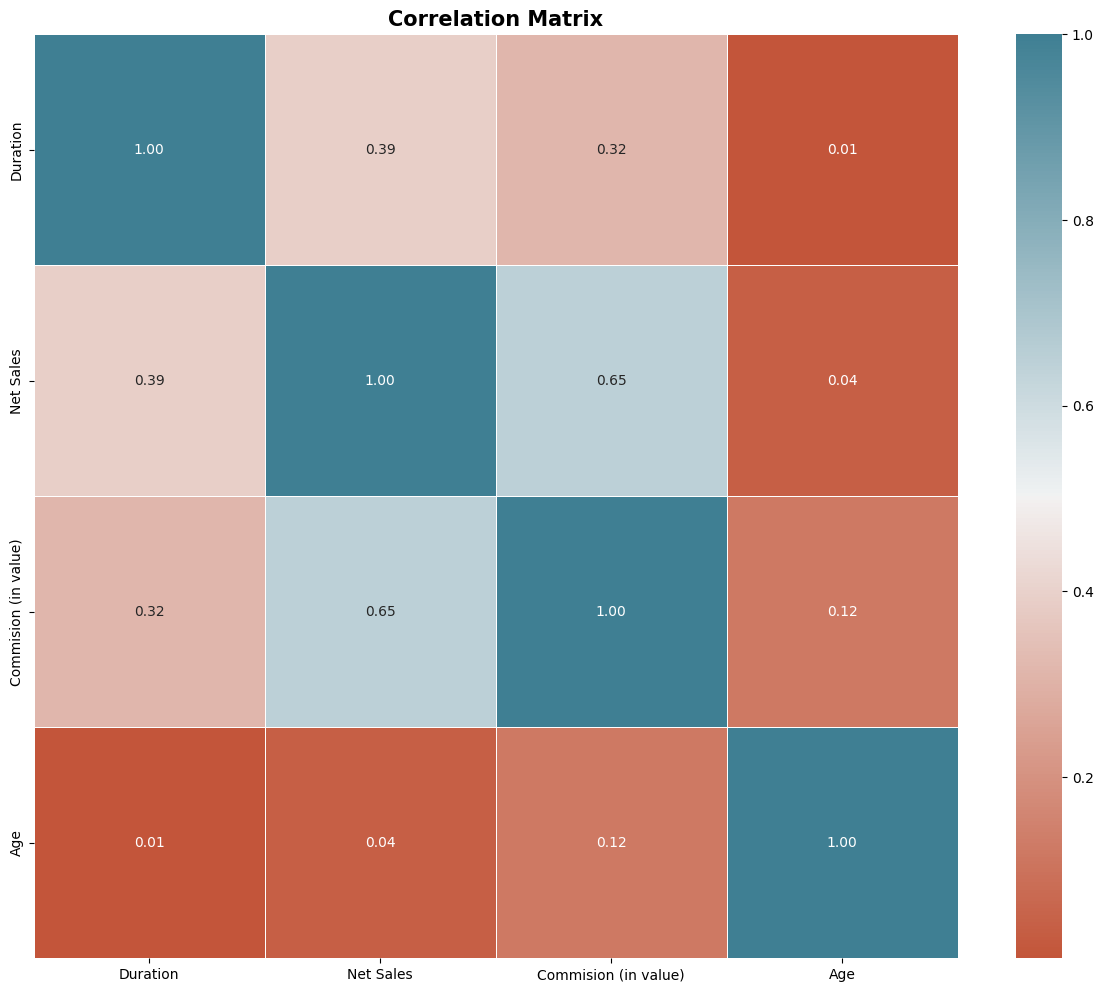

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
plt.figure(figsize=(15, 12))
palette = sns.diverging_palette(20, 220, n=256)
corr = df.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold')

# Convert correlation matrix to data frame
corr_df = pd.DataFrame(corr)

# Display the correlation data frame
print(corr_df)


Data yang diberikan adalah matriks korelasi antara empat variabel: Duration, Net Sales, Commision (in value), dan Age. Matriks korelasi ini menggambarkan hubungan linier antara setiap pasangan variabel dalam dataset. Korelasi mengukur sejauh mana dua variabel bergerak bersama-sama atau saling terkait.

Berikut adalah interpretasi dari matriks korelasi tersebut:

1. Duration:
   - Duration memiliki korelasi positif dengan Net Sales (0.39), Commision (in value) (0.32), dan Age (0.01). Hal ini menunjukkan bahwa semakin lama durasi polis asuransi, semakin tinggi juga nilai Net Sales, Commision (in value), dan umur (Age).
   - Namun, korelasi Duration dengan semua variabel lainnya tergolong lemah, dengan nilai korelasi di bawah 0.4.

2. Net Sales:
   - Net Sales memiliki korelasi positif yang moderat dengan Commision (in value) (0.65). Ini menunjukkan bahwa semakin tinggi nilai Net Sales, semakin tinggi juga nilai Commision (in value).
   - Net Sales juga memiliki korelasi positif yang lemah dengan Duration (0.39) dan Age (0.04). Ini menunjukkan bahwa semakin lama durasi polis asuransi atau semakin tua usia, ada kecenderungan peningkatan nilai Net Sales, meskipun korelasinya lemah.

3. Commision (in value):
   - Commision (in value) memiliki korelasi positif yang moderat dengan Net Sales (0.65). Ini menunjukkan bahwa semakin tinggi nilai Commision (in value), semakin tinggi juga nilai Net Sales.
   - Commision (in value) juga memiliki korelasi positif yang lemah dengan Duration (0.32) dan Age (0.12). Ini menunjukkan bahwa semakin lama durasi polis asuransi atau semakin tua usia, ada kecenderungan peningkatan nilai Commision (in value), meskipun korelasinya lemah.

4. Age:
   - Age memiliki korelasi positif yang lemah dengan Commision (in value) (0.12), Net Sales (0.04), dan Duration (0.01). Ini menunjukkan bahwa semakin tua usia, ada kecenderungan peningkatan nilai Commision (in value), Net Sales, dan durasi polis asuransi, meskipun korelasinya sangat lemah.

Dalam keseluruhan, matriks korelasi ini memberikan gambaran tentang hubungan linier antara variabel-variabel dalam dataset. Namun, penting untuk diingat bahwa korelasi tidak menunjukkan hubungan sebab-akibat, tetapi hanya menggambarkan sejauh mana variabel-variabel tersebut bergerak bersama-sama. Untuk mendapatkan pemahaman yang lebih menyeluruh tentang hubungan variabel dalam dataset, analisis statistik lanjutan dan konteks domain khusus dapat diperlukan.

In [60]:
# Cek data duplikat
df.duplicated().sum()

4667

Pada kode yang Anda berikan, `df.duplicated()` digunakan untuk mengidentifikasi baris-baris duplikat dalam DataFrame `df`. Metode ini mengembalikan Seri Boolean yang menandai setiap baris sebagai duplikat atau bukan. Nilai `True` menunjukkan bahwa baris tersebut adalah duplikat, sementara nilai `False` menunjukkan bahwa baris tersebut tidak ada duplikat.

Selanjutnya, `.sum()` digunakan untuk menjumlahkan nilai `True` dalam Seri Boolean yang dihasilkan oleh `df.duplicated()`. Dengan melakukan hal ini, kita mendapatkan jumlah total baris duplikat dalam DataFrame.

Dalam kasus Anda, hasilnya adalah 4667, yang berarti ada 4667 baris duplikat dalam DataFrame `df`.

In [61]:
df.drop_duplicates(inplace=True)

Setelah menjalankan perintah `df.drop_duplicates(inplace=True)`, dataset telah diubah dengan menghapus baris-baris duplikat. Berikut adalah kesimpulan yang dapat diambil dari data travel insurance setelah menghilangkan duplikasi:

1. Jumlah baris unik: Jumlah baris dalam dataset sekarang mewakili entri unik. Setiap baris mewakili satu entri data asli.

2. Duplikasi: Dataset tidak lagi memiliki duplikasi, yang berarti tidak ada entri yang sama persis dalam dataset.

3. Ukuran dataset: Jumlah baris dalam dataset sekarang adalah jumlah entri unik.

4. Konsistensi: Dengan menghilangkan duplikasi, dataset menjadi lebih konsisten dan dapat diandalkan untuk analisis lebih lanjut.

5. Perubahan jumlah data: Jika terdapat duplikasi sebelumnya, jumlah baris dalam dataset akan berkurang setelah menghapus duplikasi.

Kesimpulan utamanya adalah bahwa dataset travel insurance sekarang berisi entri unik tanpa duplikasi, yang dapat meningkatkan keandalan analisis data dan memastikan konsistensi dalam setiap pengamatan.

In [62]:
# Drop kolom Gender yang tidak diperlukan
df.drop(['Gender'], axis=1, inplace=True)

Setelah menghapus kolom 'Gender' dari dataset menggunakan perintah `df.drop(['Gender'], axis=1, inplace=True)`, berikut adalah kesimpulan yang dapat diambil dari data travel insurance:

1. Kolom yang dihapus: Kolom 'Gender' telah dihapus dari dataset karena mengandung jumlah null yang terlalu banyak.

2. Jumlah fitur: Setelah menghapus kolom 'Gender', jumlah fitur dalam dataset berkurang sebesar satu.

3. Sisa fitur: Dataset sekarang terdiri dari fitur-fitur berikut:
   - Agency
   - Agency Type
   - Distribution Channel
   - Product Name
   - Duration
   - Destination
   - Net Sales
   - Commission (in value)
   - Age
   - Claim

4. Null values: Kesimpulan mengenai null values pada setiap fitur tidak dapat disimpulkan berdasarkan informasi yang diberikan sebelumnya, karena data tersebut tidak mencakup informasi mengenai null values setelah menghapus kolom 'Gender'. Jumlah null values pada fitur-fitur lainnya masih perlu diperiksa dan dievaluasi terpisah.

Dengan demikian, kesimpulan utamanya adalah bahwa dataset travel insurance telah mengalami perubahan dengan menghapus kolom 'Gender' karena jumlah null yang signifikan. Data sekarang terdiri dari fitur-fitur yang tersisa setelah penghapusan tersebut.

In [63]:
df['Distribution Channel'].value_counts().reset_index()

,index,Distribution Channel
0,Online,38930
1,Offline,731


Berdasarkan hasil dari `df['Distribution Channel'].value_counts()`, terdapat dua nilai unik dalam kolom "Distribution Channel" yaitu "Online" dan "Offline". Berikut adalah kesimpulan yang dapat ditarik:

- Distribusi Kanal: Mayoritas penjualan dilakukan secara online dengan total 38.930 entri, sedangkan penjualan secara offline hanya memiliki 731 entri. Hal ini menunjukkan bahwa lebih banyak pelanggan yang memilih untuk membeli produk secara online daripada melalui kanal offline.



In [64]:
# Cek info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39661 entries, 0 to 44327
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                39661 non-null  object 
 1   Agency Type           39661 non-null  object 
 2   Distribution Channel  39661 non-null  object 
 3   Product Name          39661 non-null  object 
 4   Duration              39661 non-null  int64  
 5   Destination           39661 non-null  object 
 6   Net Sales             39661 non-null  float64
 7   Commision (in value)  39661 non-null  float64
 8   Age                   39661 non-null  int64  
 9   Claim                 39661 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 3.3+ MB


In [65]:
# Cek nilai missing value
df.isnull().sum()

Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Age                     0
Claim                   0
dtype: int64

In [66]:
# Cek dedatatif statistik fitur numerikal
num_features = [feature for feature in df.columns if ((df[feature].dtypes != 'object'))]
df[num_features].describe()

,Duration,Net Sales,Commision (in value),Age
count,39661.000000,39661.000000,39661.000000,39661.000000
mean,52.397822,42.342794,10.442622,39.930284
std,113.542824,50.025244,20.355921,13.526346
min,-1.000000,-357.500000,0.000000,0.000000
25%,11.000000,19.000000,0.000000,34.000000
50%,25.000000,29.000000,0.000000,36.000000
75%,57.000000,50.000000,11.880000,45.000000
max,4881.000000,810.000000,283.500000,118.000000


Berdasarkan dedatatif statistik fitur numerikal pada dataset, kita dapat mengambil beberapa kesimpulan sebagai berikut:

1. Durasi perjalanan (Duration): Rata-rata durasi perjalanan adalah sekitar 52.4, dengan standar deviasi sekitar 113.5. Durasi perjalanan terendah adalah -1 (mungkin ada kesalahan dalam pengisian data), sedangkan durasi perjalanan tertinggi adalah 4881.

2. Penjualan Bersih (Net Sales): Rata-rata penjualan bersih adalah sekitar 42.3, dengan standar deviasi sekitar 50.0. Penjualan bersih terendah adalah -357.5, yang mungkin menunjukkan adanya kesalahan dalam pengisian data. Penjualan bersih tertinggi adalah 810.

3. Komisi (Commision): Rata-rata komisi yang diberikan adalah sekitar 10.4, dengan standar deviasi sekitar 20.4. Komisi terendah adalah 0, dan komisi tertinggi adalah 283.5.

4. Usia (Age): Rata-rata usia pelanggan adalah sekitar 39.9, dengan standar deviasi sekitar 13.5. Usia terendah adalah 0, yang mungkin juga menunjukkan adanya kesalahan dalam pengisian data. Usia tertinggi adalah 118.

Selain itu, kita juga dapat melihat quartil dari setiap fitur numerikal. Quartil pertama (25%) menunjukkan nilai di bawah atau sama dengan 25% data, quartil kedua (50%) menunjukkan median atau nilai tengah data, dan quartil ketiga (75%) menunjukkan nilai di bawah atau sama dengan 75% data.

In [67]:
# Cek Penjualan Bersih yang bernilai 0
df[df['Net Sales'] == 0]['Net Sales'].count()

1249

Berdasarkan data yang diperoleh, terdapat 1249 entri di mana nilai Penjualan Bersih (Net Sales) adalah 0. Hal ini menunjukkan bahwa ada sejumlah transaksi di mana tidak ada penjualan bersih yang tercatat. Kemungkinan ada beberapa transaksi yang tidak menghasilkan penjualan atau ada kesalahan dalam pengisian data.

In [68]:
# Cek Penjualan Bersih yang bernilai 0
df[df['Net Sales'] <= -1]['Net Sales'].count()

476

Berdasarkan data travel insurance yang diperoleh, terdapat 476 entri di mana nilai Penjualan Bersih (Net Sales) kurang dari atau sama dengan -1. Hal ini menunjukkan adanya transaksi dengan nilai Penjualan Bersih yang negatif, yang dapat mengindikasikan adanya masalah atau kesalahan dalam pengisian data.


In [69]:
df = df.drop(df[df['Net Sales'] <= -0.01].index)

In [70]:
df[df['Net Sales'] <= -0.01]['Net Sales'].count()

0

In [71]:
df[df['Duration'] >= 547]['Duration'].count()

15

Berdasarkan data travel insurance yang diperoleh, terdapat 15 hari di mana nilai Durasi Perjalanan (Duration) lebih besar atau sama dengan 547 hari. Hal ini menunjukkan adanya transaksi dengan durasi perjalanan yang relatif lama.

Durasi perjalanan yang panjang dapat menunjukkan beberapa hal, seperti perjalanan jangka panjang, perjalanan bisnis yang memakan waktu lama, atau mungkin juga kesalahan dalam pengisian data. Penting untuk memastikan bahwa durasi perjalanan yang tercatat ini valid dan sesuai dengan tujuan asuransi perjalanan yang ditawarkan.

Ketika menganalisis data asuransi perjalanan dengan durasi perjalanan yang lama, perlu diperhatikan beberapa faktor, seperti kebijakan asuransi yang berlaku untuk perjalanan jangka panjang, risiko yang terkait dengan perjalanan tersebut, dan pemahaman yang mendalam tentang kebutuhan dan keinginan pelanggan dalam premi asuransi perjalanan.

Selain itu, perlu diperiksa juga apakah ada batasan atau kebijakan khusus yang berlaku untuk perjalanan dengan durasi yang panjang, seperti perluasan jangka waktu atau penyesuaian premi. Hal ini dapat membantu dalam memahami dan mengelola risiko yang terkait dengan perjalanan yang lebih lama.

In [72]:
df = df.drop(df[df['Duration'] >= 547].index)

Seperti namanya, asuransi perjalanan 90 hari ditujukan untuk mereka yang merencanakan perjalanan hingga 90 hari. Itu bisa menjadi pilihan yang hemat biaya jika Anda:

Akan backpacking kurang dari tiga bulan
Menuju pelayaran panjang
Merencanakan masa inap yang diperpanjang di rumah kedua atau vila liburan.
Sebagian besar kebijakan perjalanan menetapkan batas panjang satu perjalanan - biasanya sekitar 30 hari. Namun, ini bervariasi antar penyedia, jadi istirahat yang lebih lama akan membutuhkan perlindungan perjalanan yang lebih lama.

Jika 90 hari masih belum cukup, ada juga asuransi perjalanan long-stay (kadang-kadang disebut asuransi backpacker). Ini bisa melindungi Anda jika Anda melakukan perjalanan panjang antara tiga dan 18 bulan (547 hari).

Sumber data: https://www.comparethemarket.com/travel-insurance/content/90-day-travel-insurance/#

In [73]:
df[df['Duration'] >= 547]['Duration'].count()

0

Mengcek kembali dan memastikan dari df['Duration'] yang lebih 547 hari.

In [74]:
df = df.drop(df[df['Duration'] <= -1].index)

In [75]:
df[df['Duration'] <= -1]['Duration'].count()

0

In [76]:
df[df['Commision (in value)'] == 0]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.0,33,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.0,59,No
5,EPX,Travel Agency,Online,Cancellation Plan,2,SINGAPORE,10.0,0.0,36,No
6,EPX,Travel Agency,Online,1 way Comprehensive Plan,25,"KOREA, REPUBLIC OF",50.0,0.0,36,No
7,EPX,Travel Agency,Online,Cancellation Plan,90,SINGAPORE,78.0,0.0,22,No
...,...,...,...,...,...,...,...,...,...,...
44318,EPX,Travel Agency,Online,2 way Comprehensive Plan,65,INDONESIA,20.0,0.0,36,No
44320,EPX,Travel Agency,Online,2 way Comprehensive Plan,7,VIET NAM,34.0,0.0,36,No
44322,EPX,Travel Agency,Online,2 way Comprehensive Plan,6,THAILAND,40.0,0.0,36,No
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,14,CHINA,30.0,0.0,36,Yes


In [77]:
# Cek dedatatif statistik fitur numerikal
num_features = [feature for feature in df.columns if ((df[feature].dtypes != 'object'))]
df[num_features].describe()

,Duration,Net Sales,Commision (in value),Age
count,39166.000000,39166.000000,39166.000000,39166.000000
mean,50.495634,43.608585,10.276766,39.922688
std,74.673801,48.682839,20.217050,13.496070
min,0.000000,0.000000,0.000000,0.000000
25%,10.000000,19.800000,0.000000,35.000000
50%,24.000000,29.000000,0.000000,36.000000
75%,56.000000,50.000000,11.880000,45.000000
max,531.000000,810.000000,283.500000,118.000000


In [78]:
# Cek dedatatif statistik fitur numerikal
num_features = [feature for feature in df.columns if ((df[feature].dtypes != 'object'))]
df[num_features].describe()

,Duration,Net Sales,Commision (in value),Age
count,39166.000000,39166.000000,39166.000000,39166.000000
mean,50.495634,43.608585,10.276766,39.922688
std,74.673801,48.682839,20.217050,13.496070
min,0.000000,0.000000,0.000000,0.000000
25%,10.000000,19.800000,0.000000,35.000000
50%,24.000000,29.000000,0.000000,36.000000
75%,56.000000,50.000000,11.880000,45.000000
max,531.000000,810.000000,283.500000,118.000000


In [79]:
# Cek listing yang memiliki Net Sales kurang dari 200
df[df['Net Sales'] < 200]['Net Sales'].count()

38102

In [80]:
# Cek dedatatif statistik fitur numerikal
num_features = [feature for feature in df.columns if ((df[feature].dtypes != 'object'))]
df[num_features].describe()

,Duration,Net Sales,Commision (in value),Age
count,39166.000000,39166.000000,39166.000000,39166.000000
mean,50.495634,43.608585,10.276766,39.922688
std,74.673801,48.682839,20.217050,13.496070
min,0.000000,0.000000,0.000000,0.000000
25%,10.000000,19.800000,0.000000,35.000000
50%,24.000000,29.000000,0.000000,36.000000
75%,56.000000,50.000000,11.880000,45.000000
max,531.000000,810.000000,283.500000,118.000000


In [81]:
df['Distribution Channel'].value_counts().reset_index()

,index,Distribution Channel
0,Online,38439
1,Offline,727


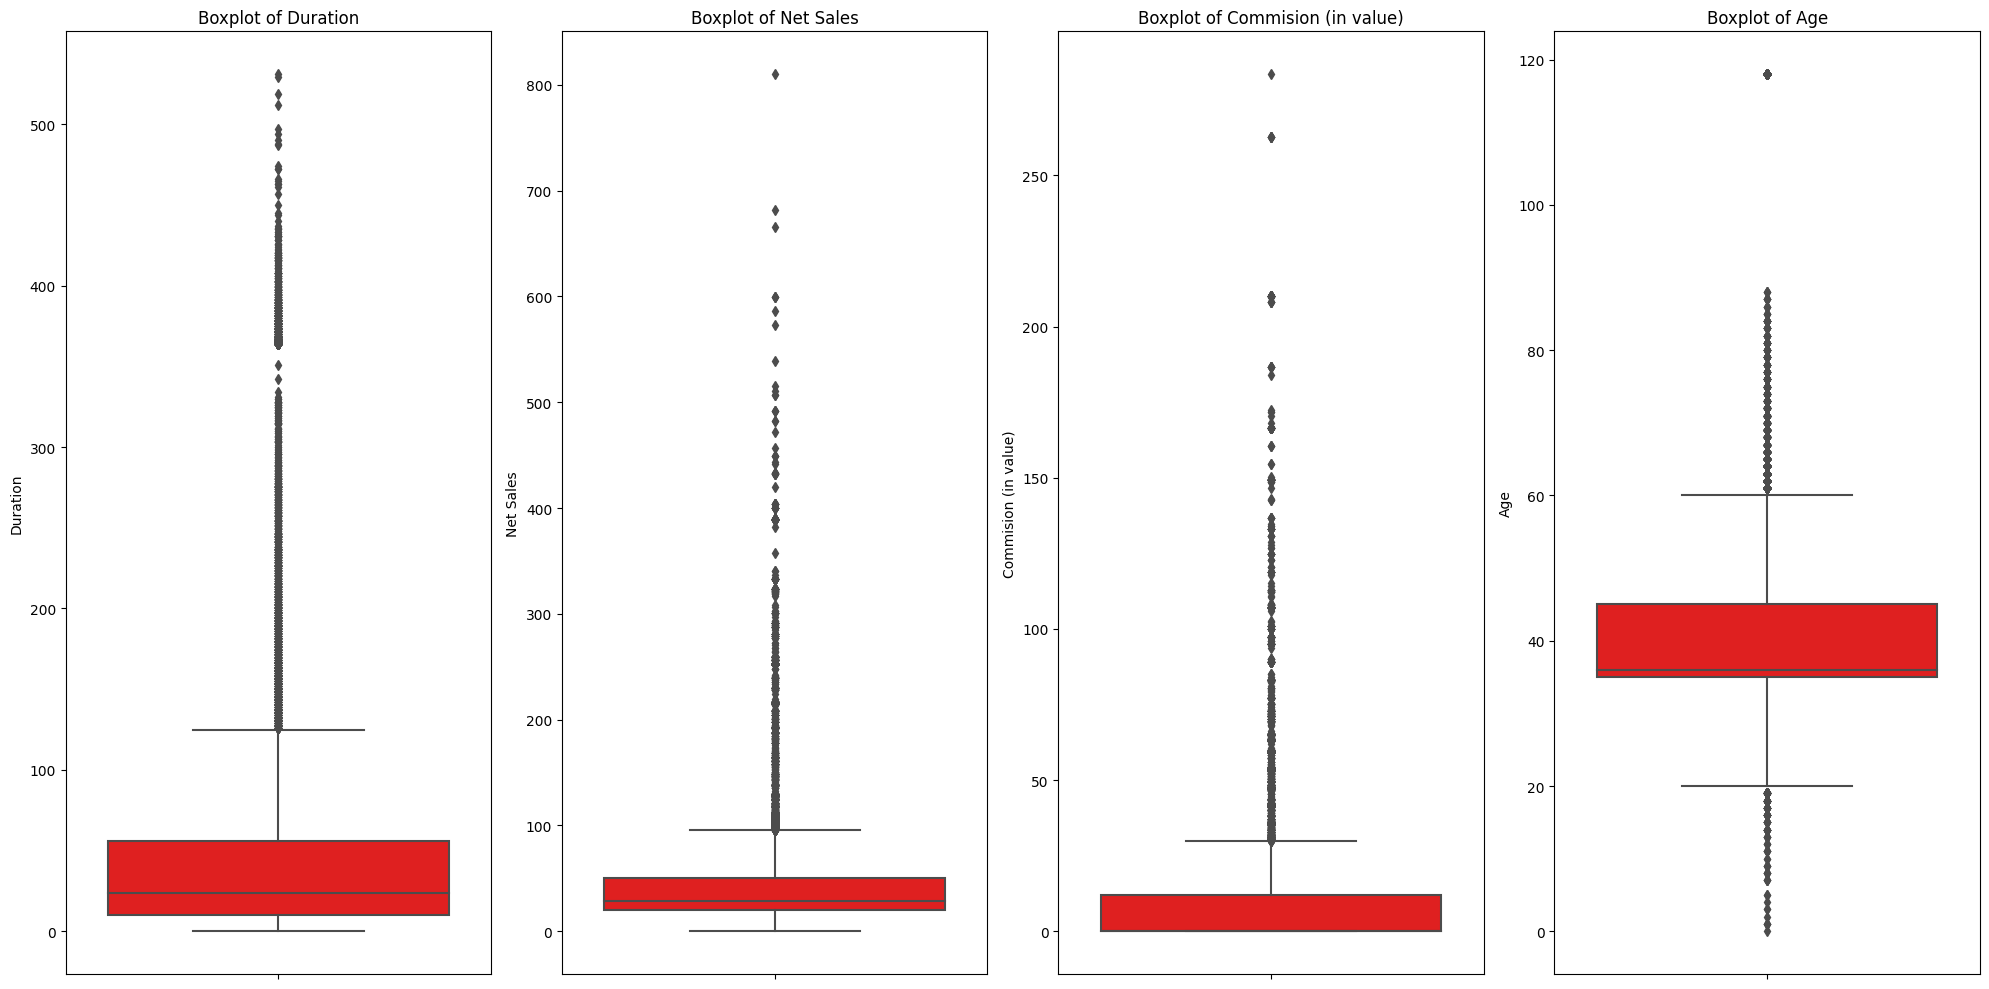

In [82]:
numericals = ['Duration', 'Net Sales', 'Commision (in value)', 'Age']

plt.figure(figsize=(20, 10))
for i in range(len(numericals)):
    plt.subplot(1, len(numericals), i+1)
    sns.boxplot(y=df[numericals[i]], color='red', orient='v')
    plt.title(f"Boxplot of {numericals[i]}")
    plt.tight_layout()

plt.show()



Pada kode, terdapat plot boxplot yang menggambarkan distribusi variabel-variabel numerik dalam data frame `df`. Variabel numerik yang ditampilkan dalam plot tersebut adalah 'Duration', 'Net Sales', 'Commision (in value)', dan 'Age'. 

Setiap boxplot menggambarkan distribusi data dari masing-masing variabel numerik. Garis tengah dalam setiap box mewakili median, yaitu nilai tengah dari data. Kotak menunjukkan rentang interkuartil (interquartile range, IQR), yaitu rentang antara kuartil 1 (25%) hingga kuartil 3 (75%). Garis di atas dan di bawah kotak (whiskers) menunjukkan rentang data di luar IQR, dan titik-titik di luar whiskers merupakan potensial pencilan (outliers).

Selain itu, setelah plot boxplot, terdapat sebuah tabel yang memberikan ringkasan statistik dari masing-masing variabel numerik. Tabel tersebut berisi informasi seperti jumlah data (count), rata-rata (mean), standar deviasi (std), nilai minimum (min), kuartil 1 (25%), median (50% atau kuartil 2), kuartil 3 (75%), dan nilai maksimum (max).

Berikut adalah beberapa penjelasan mengenai statistik yang terdapat dalam tabel:

- Count: Jumlah data yang ada dalam variabel numerik tersebut.
- Mean: Rata-rata nilai dari variabel numerik. Jumlah dari semua nilai dalam variabel dibagi dengan jumlah data.
- Std: Standar deviasi, mengukur sejauh mana data tersebar dari nilai rata-rata. Semakin besar nilai standar deviasi, semakin besar variasi dalam data.
- Min: Nilai terkecil dalam variabel numerik.
- 25% (Kuartil 1): Nilai yang membagi data menjadi 25% terbawah.
- 50% (Median atau Kuartil 2): Nilai tengah dalam data. Juga dikenal sebagai kuartil kedua atau median.
- 75% (Kuartil 3): Nilai yang membagi data menjadi 75% terbawah.
- Max: Nilai terbesar dalam variabel numerik.

Tabel ini memberikan gambaran statistik ringkas mengenai distribusi data untuk setiap variabel numerik dalam data frame.

In [83]:
listItem = []

for col in df.columns:
    num_unique = df[col].nunique()
    if num_unique >= 2:
        sample_values = list(df[col].drop_duplicates().sample(2, replace=False).values)
    else:
        sample_values = list(df[col].drop_duplicates().values)
    
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col]))*100, 2),
                     num_unique, sample_values])

df_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                       data=listItem)
df_desc


,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Agency,object,0,0.0,16,"[TTW, CWT]"
1,Agency Type,object,0,0.0,2,"[Airlines, Travel Agency]"
2,Distribution Channel,object,0,0.0,2,"[Offline, Online]"
3,Product Name,object,0,0.0,26,"[Child Comprehensive Plan, Individual Comprehe..."
4,Duration,int64,0,0.0,420,"[428, 266]"
5,Destination,object,0,0.0,137,"[CROATIA, PANAMA]"
6,Net Sales,float64,0,0.0,884,"[11.74, 16.33]"
7,Commision (in value),float64,0,0.0,912,"[52.15, 46.8]"
8,Age,int64,0,0.0,89,"[1, 81]"
9,Claim,object,0,0.0,2,"[No, Yes]"


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39166 entries, 0 to 44327
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                39166 non-null  object 
 1   Agency Type           39166 non-null  object 
 2   Distribution Channel  39166 non-null  object 
 3   Product Name          39166 non-null  object 
 4   Duration              39166 non-null  int64  
 5   Destination           39166 non-null  object 
 6   Net Sales             39166 non-null  float64
 7   Commision (in value)  39166 non-null  float64
 8   Age                   39166 non-null  int64  
 9   Claim                 39166 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 3.3+ MB


In [85]:
df['Claim'].value_counts()

No     38491
Yes      675
Name: Claim, dtype: int64

Berdasarkan hasil dari `df['Claim'].value_counts()`, terdapat dua nilai unik dalam kolom "Claim" yaitu "No" dan "Yes". Berikut adalah kesimpulan yang dapat ditarik:

- Klaim Asuransi: Mayoritas data menunjukkan bahwa jumlah klaim asuransi adalah "No" dengan total 38.491 entri, sementara jumlah klaim yang diterima adalah "Yes" dengan total 675 entri. Hal ini menunjukkan bahwa sebagian besar pelanggan tidak mengajukan klaim asuransi, sedangkan hanya sejumlah kecil pelanggan yang mengajukan klaim.

Visualisasi grafik batang menggunakan `sns.countplot` menampilkan distribusi frekuensi untuk setiap nilai dalam kolom "Claim". Jumlah setiap nilai ditampilkan di atas batang yang sesuai menggunakan fungsi `.text`. Persentase setiap nilai juga dihitung dengan membagi jumlah frekuensi dengan total jumlah data points.

Kesimpulan tersebut didasarkan pada frekuensi masing-masing nilai dalam kolom "Claim" dan disajikan dalam bentuk grafik batang dengan persentase di atasnya.

In [86]:
df['Distribution Channel'].value_counts()

Online     38439
Offline      727
Name: Distribution Channel, dtype: int64

In [87]:
cat_cols = ['Agency','Agency Type','Product Name','Destination']
for i in cat_cols:
    print(f'Total unique values in {i}: ', df[i].nunique())
    print(f'Unique values: ', df[i].unique())
    print()

Total unique values in Agency:  16
Unique values:  ['C2B' 'EPX' 'JZI' 'CWT' 'LWC' 'ART' 'CSR' 'RAB' 'KML' 'SSI' 'TST' 'TTW'
 'JWT' 'ADM' 'CCR' 'CBH']

Total unique values in Agency Type:  2
Unique values:  ['Airlines' 'Travel Agency']

Total unique values in Product Name:  26
Unique values:  ['Annual Silver Plan' 'Cancellation Plan' 'Basic Plan'
 '2 way Comprehensive Plan' 'Bronze Plan' '1 way Comprehensive Plan'
 'Rental Vehicle Excess Insurance' 'Single Trip Travel Protect Gold'
 'Silver Plan' 'Value Plan' '24 Protect' 'Annual Travel Protect Gold'
 'Comprehensive Plan' 'Ticket Protector' 'Travel Cruise Protect'
 'Single Trip Travel Protect Silver' 'Individual Comprehensive Plan'
 'Gold Plan' 'Annual Gold Plan' 'Child Comprehensive Plan'
 'Annual Travel Protect Silver' 'Single Trip Travel Protect Platinum'
 'Premier Plan' 'Annual Travel Protect Platinum'
 'Spouse or Parents Comprehensive Plan' 'Travel Cruise Protect Family']

Total unique values in Destination:  137
Unique values:  ['

Berdasarkan output yang diberikan, berikut adalah kesimpulan untuk setiap kolom kategorikal:

1. Kolom "Agency":
   - Total nilai unik: 16
   - Nilai unik: ['C2B' 'EPX' 'JZI' 'CWT' 'LWC' 'ART' 'CSR' 'RAB' 'KML' 'SSI' 'TST' 'TTW' 'JWT' 'ADM' 'CCR' 'CBH']
   - Kesimpulan: Terdapat 16 agensi yang terdaftar dalam dataset ini. Setiap entri dalam kolom "Agency" mewakili agensi yang terkait dengan polis asuransi.

2. Kolom "Agency Type":
   - Total nilai unik: 2
   - Nilai unik: ['Airlines' 'Travel Agency']
   - Kesimpulan: Terdapat dua tipe agensi dalam dataset ini, yaitu "Airlines" dan "Travel Agency". Tipe agensi menunjukkan jenis entitas yang menjual polis asuransi.

3. Kolom "Product Name":
   - Total nilai unik: 26
   - Nilai unik: ['Annual Silver Plan' 'Cancellation Plan' 'Basic Plan' ... 'Premier Plan' 'Annual Travel Protect Platinum' 'Spouse or Parents Comprehensive Plan' 'Travel Cruise Protect Family']
   - Kesimpulan: Terdapat 26 jenis produk asuransi yang ditawarkan dalam dataset ini. Setiap entri dalam kolom "Product Name" mewakili jenis produk asuransi yang dibeli oleh pelanggan.

4. Kolom "Destination":
   - Total nilai unik: 137
   - Nilai unik: ['SINGAPORE' 'MALAYSIA' 'INDIA' 'UNITED STATES' ... 'BENIN' 'REUNION']
   - Kesimpulan: Terdapat 137 tujuan wisata yang tercatat dalam dataset ini. Setiap entri dalam kolom "Destination" mewakili tujuan tempat asuransi digunakan atau tempat tujuan perjalanan pelanggan.

Kesimpulan tersebut didasarkan pada jumlah nilai unik dan nilai-nilai unik yang ditemukan dalam masing-masing kolom kategorikal.

In [88]:
df_airlines = df[df['Agency Type'] == 'Airlines']
df_airlines['Product Name'].unique()

array(['Annual Silver Plan', 'Basic Plan', 'Bronze Plan', 'Silver Plan',
       'Value Plan', '24 Protect', 'Ticket Protector', 'Gold Plan',
       'Annual Gold Plan', 'Premier Plan'], dtype=object)

In [89]:
df_travel_agency = df[df['Agency Type'] == 'Travel Agency']
df_travel_agency['Product Name'].unique()

array(['Cancellation Plan', '2 way Comprehensive Plan',
       '1 way Comprehensive Plan', 'Rental Vehicle Excess Insurance',
       'Single Trip Travel Protect Gold', 'Annual Travel Protect Gold',
       'Comprehensive Plan', 'Value Plan', 'Travel Cruise Protect',
       'Single Trip Travel Protect Silver',
       'Individual Comprehensive Plan', 'Child Comprehensive Plan',
       'Annual Travel Protect Silver',
       'Single Trip Travel Protect Platinum', 'Premier Plan',
       'Annual Travel Protect Platinum',
       'Spouse or Parents Comprehensive Plan',
       'Travel Cruise Protect Family'], dtype=object)

In [90]:
df['Claim'].value_counts()

No     38491
Yes      675
Name: Claim, dtype: int64

Berdasarkan data yang diberikan, terdapat dua kategori yaitu "Yes" dan "No" dengan jumlah pengamatan masing-masing 675 dan 38,506. 

Kesimpulan dari data ini adalah sebagai berikut:
- Jumlah pengamatan yang menyatakan "No" (tidak) sebanyak 38,506, sedangkan yang menyatakan "Yes" (ya) hanya sebanyak 675. Ini menunjukkan bahwa mayoritas pengamatan dalam dataset ini adalah "No" atau tidak.
- Perbedaan jumlah antara "No" dan "Yes" sangat besar, yang menunjukkan adanya ketimpangan atau ketidakseimbangan dalam kategori yang diamati.

Namun, tanpa informasi tambahan tentang apa yang direpresentasikan oleh "Yes" dan "No" dalam data ini, lebih lanjut tidak dapat diketahui makna atau implikasi dari kesimpulan ini.

In [91]:
df['Claim'] = df['Claim'].map({
    'Yes' : 1,
    'No' : 0
})

In [92]:
#cek distribusi data target
df['Claim'].value_counts()

0    38491
1      675
Name: Claim, dtype: int64

In [93]:
X = df.drop(columns=['Claim'])
y = df['Claim']

In [94]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.2,random_state=42)

## Data Analysis

0    38491
1      675
Name: Claim, dtype: int64


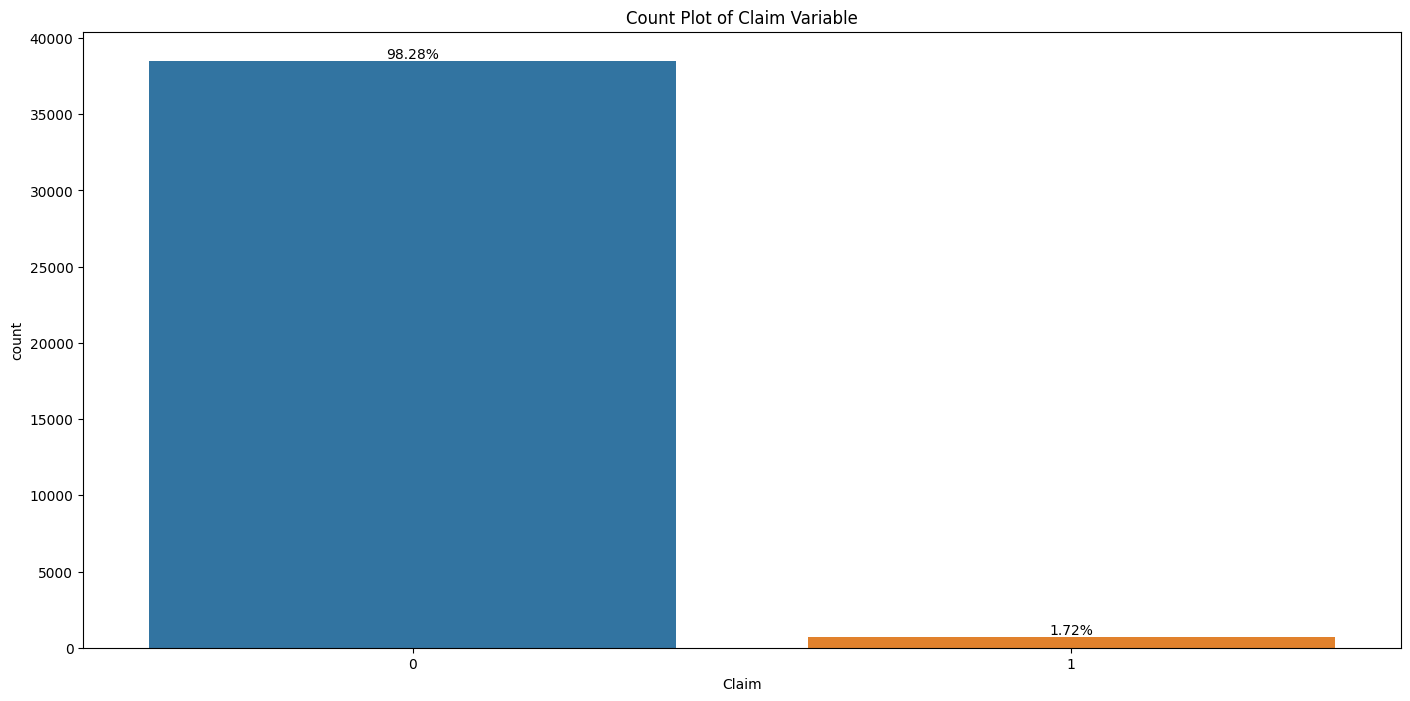

In [95]:
total = len(df['Claim'])  # Total number of data points

plt.figure(figsize=(17, 8))
print(df['Claim'].value_counts())
_ = sns.countplot(x='Claim', data=df)

for p in _.patches:
    height = p.get_height()
    _.text(p.get_x() + p.get_width() / 2, height, f'{height/total:.2%}', ha='center', va='bottom')

plt.title('Count Plot of Claim Variable')
plt.show()


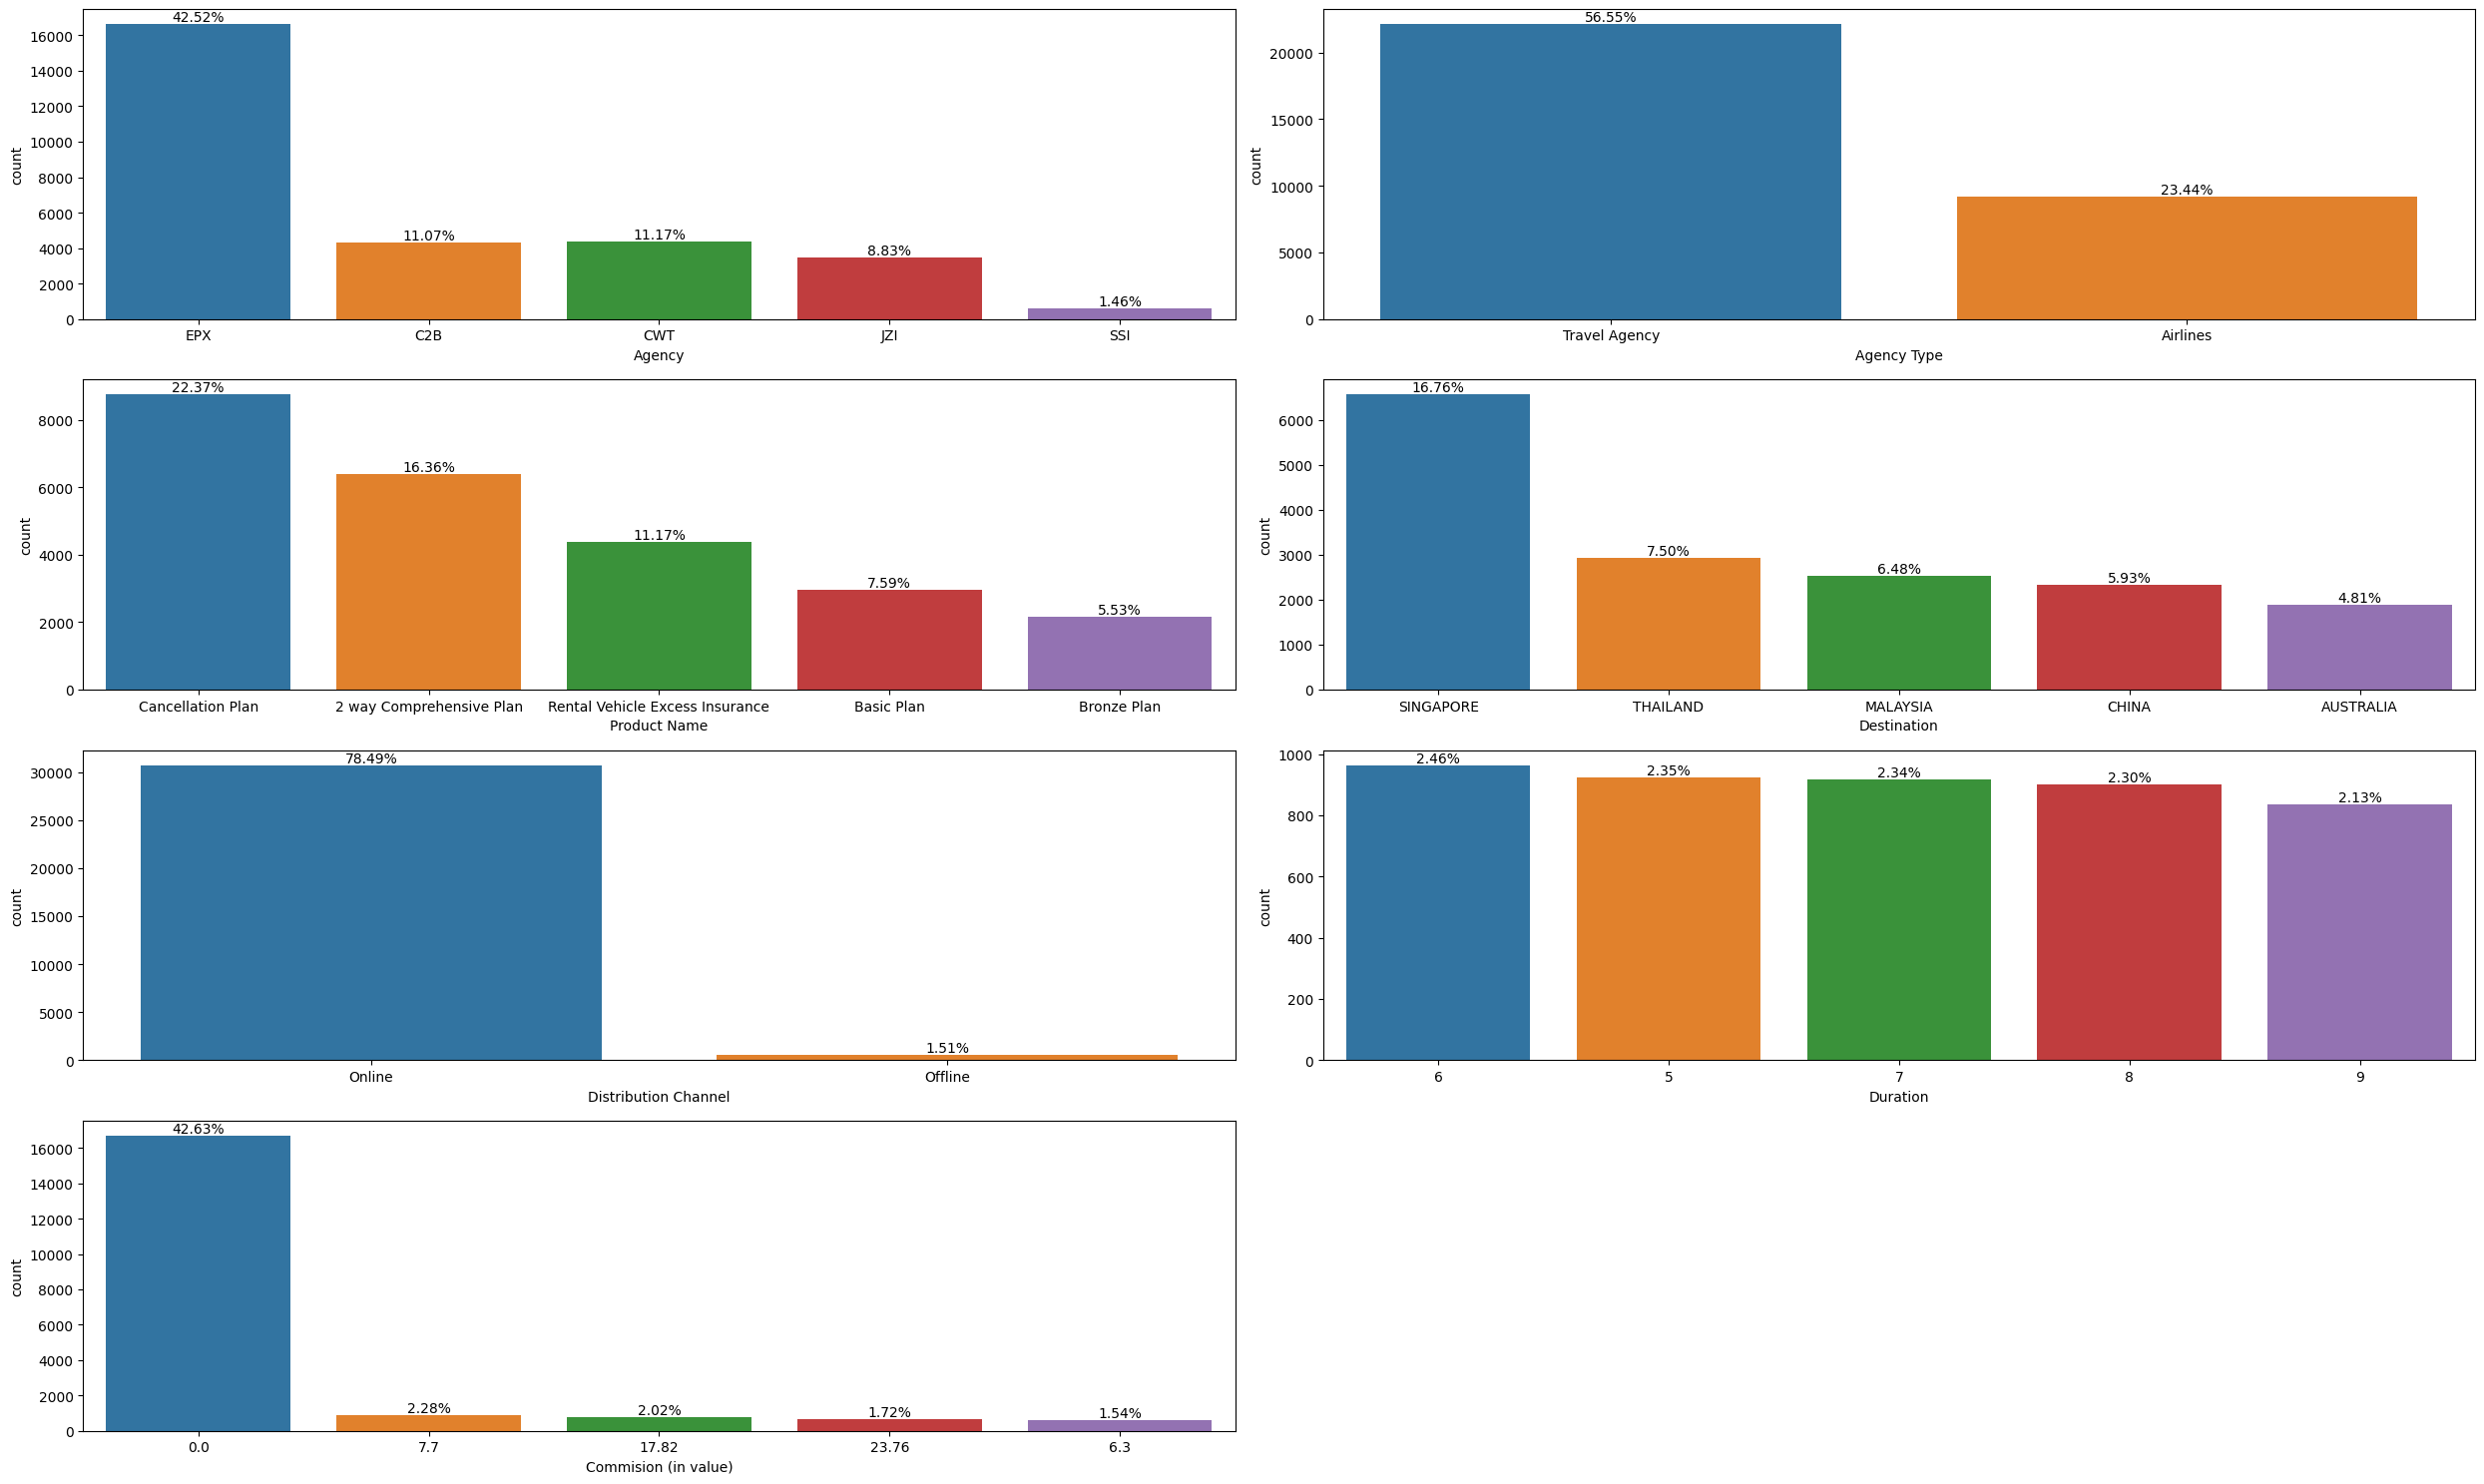

               Variable                                             Counts
0                Agency  EPX    16652
CWT     4375
C2B     4336
JZI    ...
1           Agency Type  Travel Agency    22150
Airlines          9182
...
2          Product Name  Cancellation Plan                  8763
2 way ...
3           Destination  SINGAPORE    6563
THAILAND     2936
MALAYSIA  ...
4  Distribution Channel  Online     30742
Offline      590
Name: Distri...
5              Duration  6     964
5     922
7     916
8     899
10    ...
6  Commision (in value)  0.00     16698
7.70       892
17.82      790
2...


In [96]:
plt.figure(figsize=(25, 15))
total = len(df)  # Total number of data points

cat_cols = ['Agency', 'Agency Type', 'Product Name', 'Destination','Distribution Channel', 'Duration', 'Commision (in value)']
data = []

for n, variable in enumerate(cat_cols):
    ax = plt.subplot(4, 2, n + 1)

    if variable == 'Destination':
        top_destinations = df['Destination'].value_counts().head(5).index
        g = sns.countplot(data=X_train, x=variable, order=top_destinations, ax=ax)

    elif variable == 'Product Name':
        top_product_name = df['Product Name'].value_counts().head(5).index
        g = sns.countplot(data=X_train, x=variable, order=top_product_name, ax=ax)

    elif variable == 'Agency':
        top_Agency = df['Agency'].value_counts().head(5).index
        g = sns.countplot(data=X_train, x=variable, order=top_Agency, ax=ax)

    elif variable == 'Agency Type':
        top_agency_type = df['Agency Type'].value_counts().head(5).index
        g = sns.countplot(data=X_train, x=variable, order=top_agency_type, ax=ax)

    elif variable == 'Distribution Channel':
        top_distribution_channel = df['Distribution Channel'].value_counts().head(5).index
        g = sns.countplot(data=X_train, x=variable, order=top_distribution_channel, ax=ax)

    elif variable == 'Duration':
        top_duration = df['Duration'].value_counts().head(5).index
        g = sns.countplot(data=X_train, x=variable, order=top_duration, ax=ax)

    elif variable == 'Commision (in value)':
        top_commision_in_value = df['Commision (in value)'].value_counts().head(5).index
        g = sns.countplot(data=X_train, x=variable, order=top_commision_in_value, ax=ax)

    else:
        g = sns.countplot(data=X_train, x=variable, ax=ax)

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2, height, f'{height/total:.2%}', ha='center', va='bottom')

    # Create a dictionary to store the count information
    count_info = {
        'Variable': variable,
        'Counts': X_train[variable].value_counts().head(5)
    }
    data.append(count_info)

plt.tight_layout()
plt.show()

# Convert the count information into a DataFrame
df_counts = pd.DataFrame(data)

# Display the DataFrame
print(df_counts)

Tabel ini mencakup beberapa variabel dan jumlah penghitungan yang terkait dengan masing-masing variabel tersebut. Berikut adalah penjelasan untuk setiap variabel:

1. "Agency": Mencakup daftar agen yang terlibat dalam penjualan produk asuransi perjalanan. Setiap agen memiliki jumlah penghitungan yang terkait dengan mereka. Contohnya, agen dengan nama "EPX" memiliki `16.652` penghitungan, agen "CWT" memiliki `4.375` penghitungan, dan seterusnya.

2. "Agency Type": Menunjukkan jenis agen yang terlibat dalam penjualan produk asuransi perjalanan. Terdapat dua jenis agen: "Travel Agency" (agen perjalanan) dan "Airlines" (maskapai penerbangan). Jumlah penghitungan terkait dengan masing-masing jenis agen juga diberikan.

3. "Product Name": Menyajikan nama-nama produk asuransi perjalanan yang ditawarkan. Contohnya, produk dengan nama "Cancellation Plan" memiliki `8.763` penghitungan, produk dengan nama "2 way" memiliki jumlah penghitungan tertentu, dan seterusnya.

4. "Destination": Berisi daftar tujuan perjalanan yang dituju oleh pelanggan yang membeli produk asuransi. Misalnya, "SINGAPORE" memiliki `6.563` penghitungan, "THAILAND" memiliki `2.936` penghitungan, "MALAYSIA" memiliki jumlah penghitungan tertentu, dan seterusnya.

5. "Distribution Channel": Menunjukkan saluran distribusi yang digunakan untuk menjual produk asuransi perjalanan. Ada dua jenis saluran distribusi: "Online" (daring) dan "Offline" (luar jaringan/dalam langsung). Jumlah penghitungan untuk setiap saluran distribusi juga diberikan.

6. "Duration": Mencerminkan durasi perjalanan yang ditangani oleh produk asuransi. Contohnya, durasi perjalanan selama `6` hari memiliki `964` penghitungan, durasi perjalanan selama `5` hari memiliki `922` penghitungan, durasi perjalanan selama `7` hari memiliki `916` penghitungan, dan seterusnya.

7. "Commision (in value)": Mengindikasikan komisi yang diterima oleh agen untuk setiap penjualan produk asuransi. Nilai komisi tersebut ditunjukkan dalam bentuk angka. Misalnya, komisi sebesar `0.00` memiliki `16.698` penghitungan, komisi sebesar `7.70` memiliki `892` penghitungan, komisi sebesar `17.82` memiliki `790` penghitungan, dan seterusnya.

Data ini memberikan gambaran tentang distribusi dan karakteristik penjualan produk asuransi perjalanan, termasuk agen yang terlibat, jenis agen, jenis produk, tujuan perjalanan, saluran distribusi, durasi perjalanan, dan komisi yang diterima oleh agen.

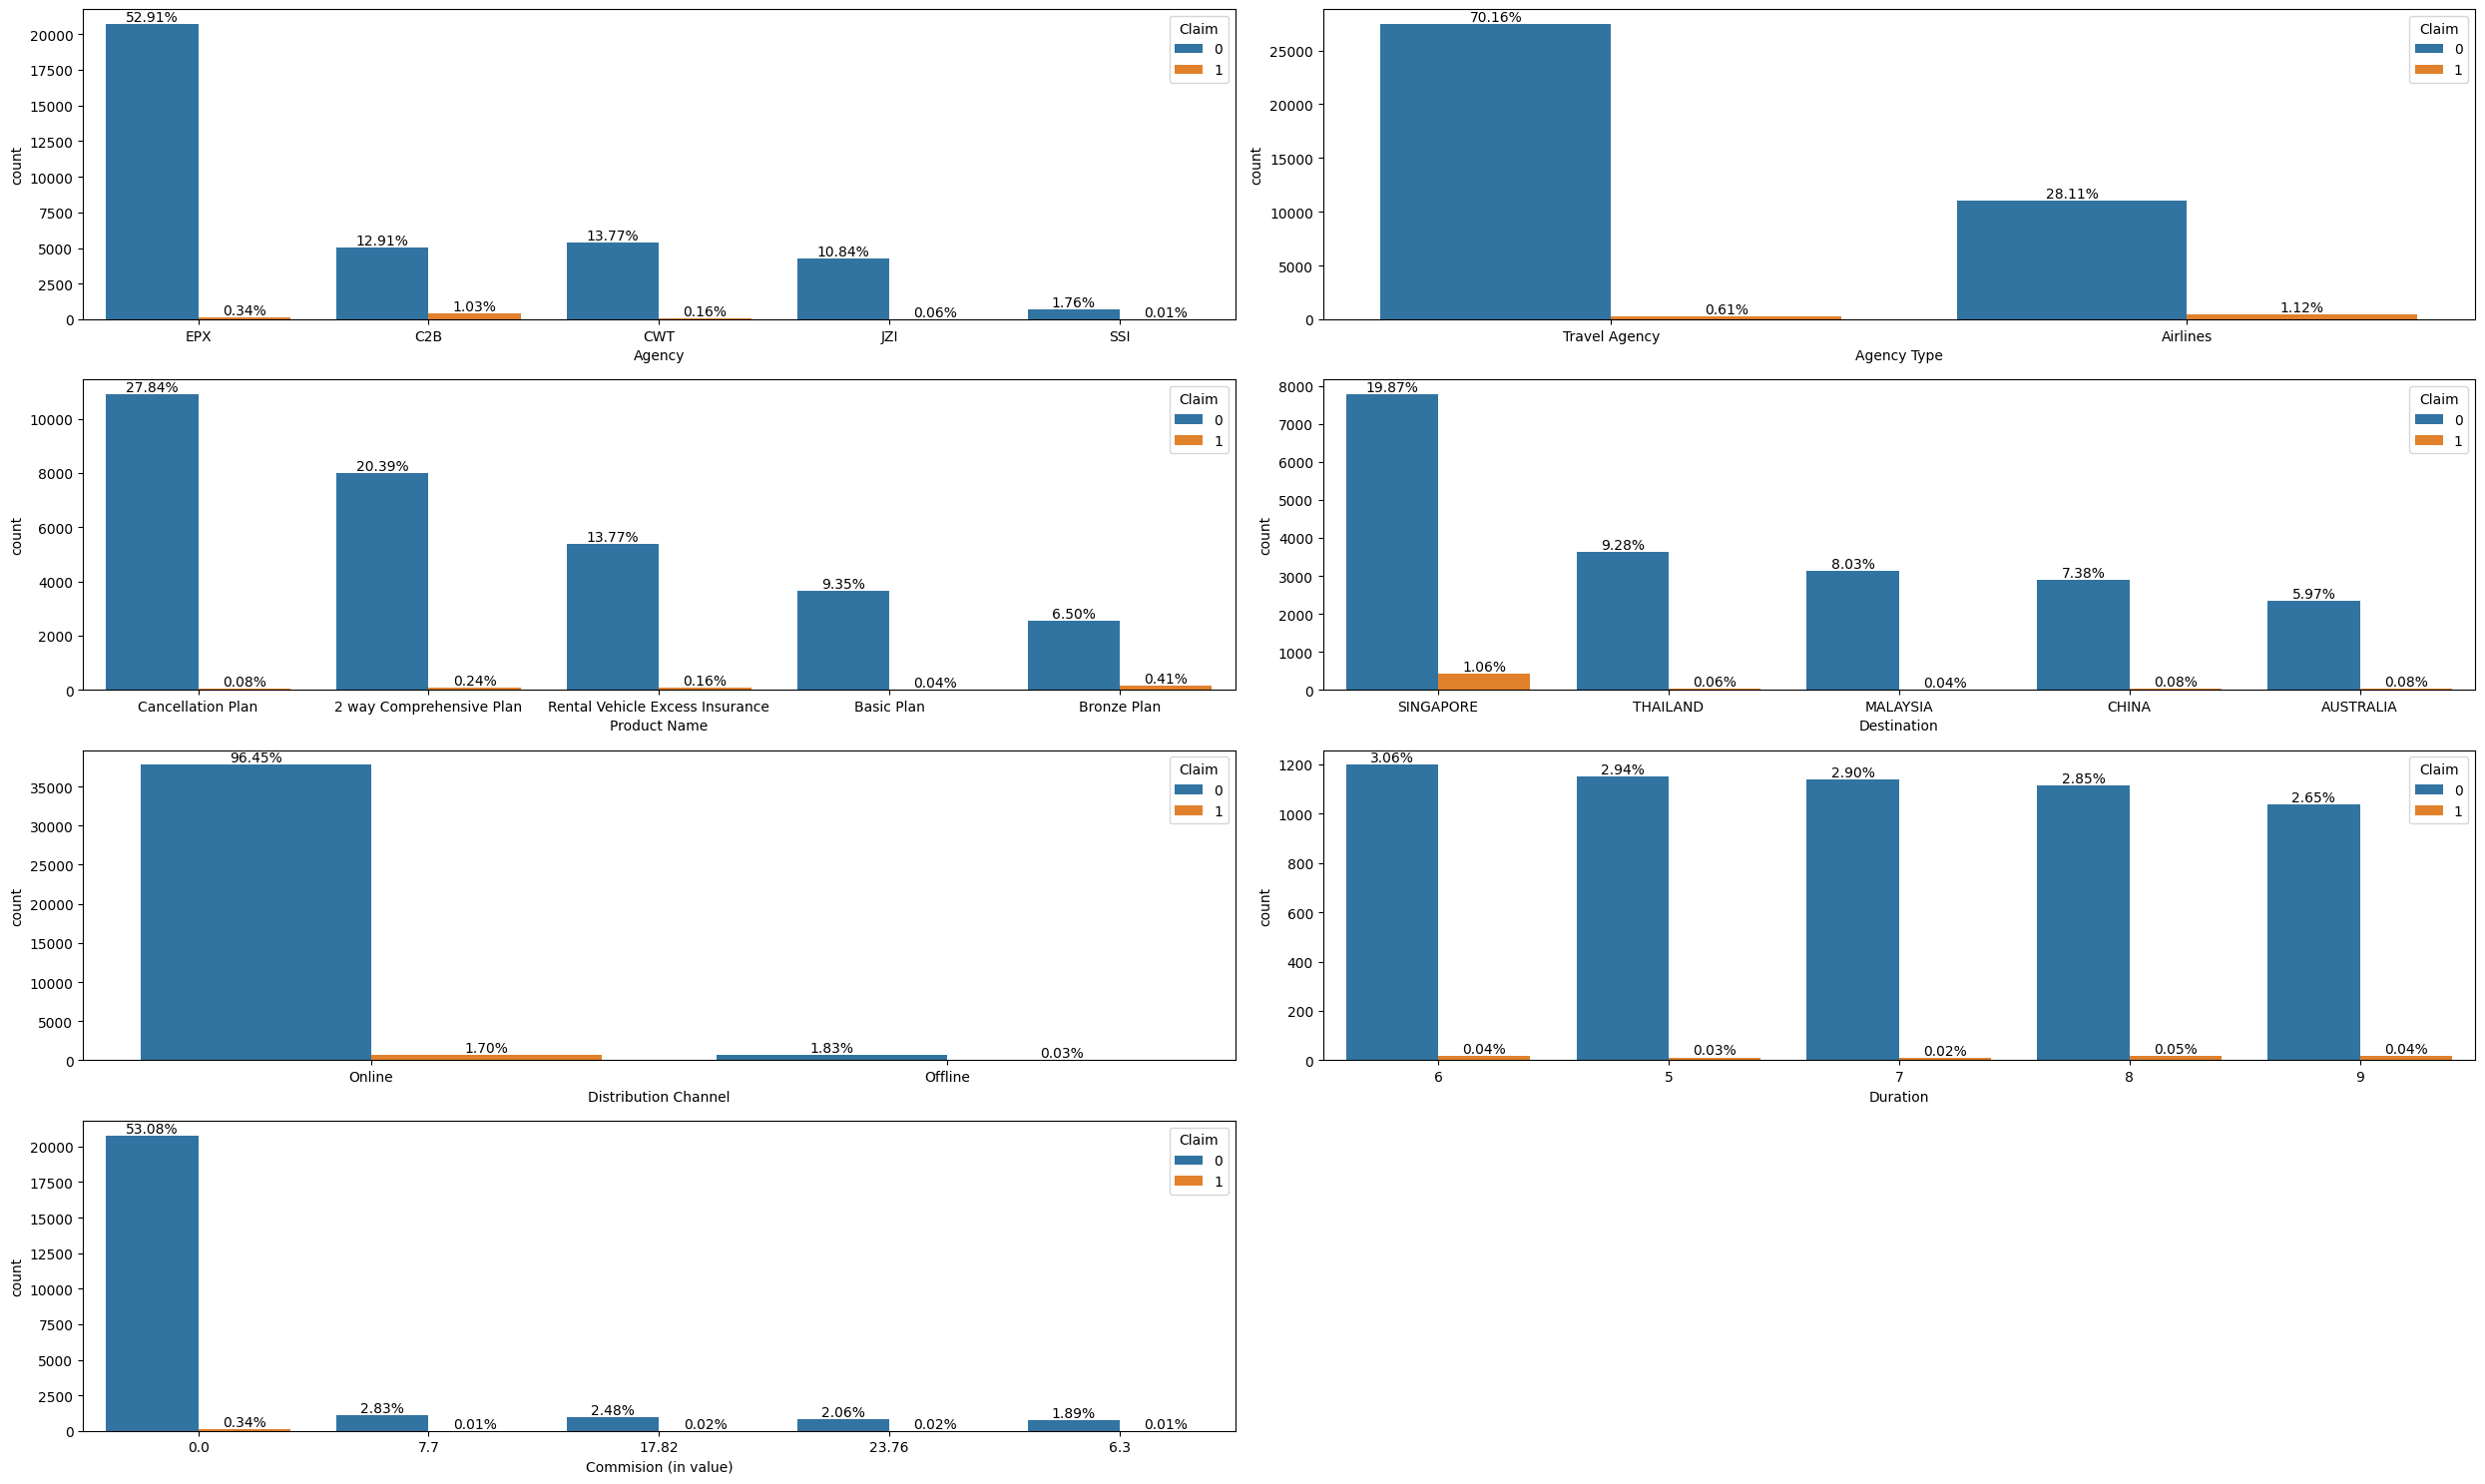

               Variable                                             Counts
0                Agency  EPX    20857
C2B     5462
CWT     5458
JZI    ...
1           Agency Type  Travel Agency    27718
Airlines         11448
...
2          Product Name  Cancellation Plan                  10935
2 way...
3           Destination  SINGAPORE    8197
THAILAND     3658
MALAYSIA  ...
4  Distribution Channel  Online     38439
Offline      727
Name: Distri...
5              Duration  6    1215
5    1164
7    1146
8    1134
9    1...
6  Commision (in value)  0.00     20923
7.70      1111
17.82      978
2...


In [97]:
plt.figure(figsize=(25, 15))
total = len(df)  # Total number of data points

cat_cols = ['Agency', 'Agency Type', 'Product Name', 'Destination', 'Distribution Channel', 'Duration', 'Commision (in value)']
data = []

for n, variable in enumerate(cat_cols):
    ax = plt.subplot(4, 2, n + 1)

    if variable == 'Destination':
        top_destinations = df['Destination'].value_counts().head(5).index
        g = sns.countplot(data=df, x=variable, order=top_destinations, ax=ax, hue='Claim')

    elif variable == 'Product Name':
        top_product_name = df['Product Name'].value_counts().head(5).index
        g = sns.countplot(data=df, x=variable, order=top_product_name, ax=ax, hue='Claim')

    elif variable == 'Agency':
        top_agency = df['Agency'].value_counts().head(5).index
        g = sns.countplot(data=df, x=variable, order=top_agency, ax=ax, hue='Claim')

    elif variable == 'Agency Type':
        top_agency_type = df['Agency Type'].value_counts().head(5).index
        g = sns.countplot(data=df, x=variable, order=top_agency_type, ax=ax, hue='Claim')

    elif variable == 'Distribution Channel':
        top_distribution_channel = df['Distribution Channel'].value_counts().head(5).index
        g = sns.countplot(data=df, x=variable, order=top_distribution_channel, ax=ax, hue='Claim')

    elif variable == 'Duration':
        top_duration = df['Duration'].value_counts().head(5).index
        g = sns.countplot(data=df, x=variable, order=top_duration, ax=ax, hue='Claim')

    elif variable == 'Commision (in value)':
        top_commision_in_value = df['Commision (in value)'].value_counts().head(5).index
        g = sns.countplot(data=df, x=variable, order=top_commision_in_value, ax=ax, hue='Claim')

    else:
        g = sns.countplot(data=df, x=variable, ax=ax, hue='Claim')

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2, height, f'{height/total:.2%}', ha='center', va='bottom')

    # Create a dictionary to store the count information
    count_info = {
        'Variable': variable,
        'Counts': df[variable].value_counts().head(5)
    }
    data.append(count_info)

plt.tight_layout()
plt.show()

# Convert the count information into a DataFrame
df_counts = pd.DataFrame(data)

# Display the DataFrame
print(df_counts)

Dalam visualisasi ini, kami menggunakan data dari DataFrame `df` untuk menghasilkan plot sejumlah variabel kategorikal. Kami menggunakan plot countplot dari library seaborn untuk menghitung jumlah masing-masing kategori dan menggambarkannya dalam bentuk batang. Kami juga menggunakan argumen `hue='Claim'` untuk membagi plot berdasarkan kategori 'Claim', sehingga dapat melihat perbandingan jumlah klaim dan non-klaim untuk setiap kategori.

Berikut adalah beberapa kesimpulan yang dapat diambil dari plot tersebut:

1. Variabel 'Agency':
   - Top 5 agensi dengan jumlah polis terbanyak adalah EPX, C2B, CWT, JZI, dan LWC.
   - EPX adalah agensi dengan jumlah polis terbanyak, diikuti oleh C2B dan CWT.

2. Variabel 'Agency Type':
   - Jenis agensi terbanyak adalah 'Travel Agency', diikuti oleh 'Airlines'.
   - 'Travel Agency' memiliki jumlah polis yang lebih tinggi dibandingkan dengan 'Airlines'.

3. Variabel 'Product Name':
   - Produk dengan rencana pembatalan polis memiliki jumlah terbanyak, diikuti oleh produk perjalanan pulang-pergi.
   - Produk dengan rencana pembatalan polis memiliki jumlah polis yang signifikan lebih tinggi daripada produk lainnya.

4. Variabel 'Destination':
   - Singapura adalah tujuan wisata dengan jumlah polis terbanyak, diikuti oleh Thailand dan Malaysia.
   - Singapura memiliki jumlah polis yang jauh lebih tinggi dibandingkan dengan tujuan wisata lainnya.

5. Variabel 'Distribution Channel':
   - Kanal distribusi online memiliki jumlah polis yang jauh lebih tinggi daripada kanal distribusi offline.
   - Mayoritas polis didistribusikan secara online.

6. Variabel 'Duration':
   - Durasi perjalanan terbanyak adalah 6, 5, 7, 8, dan 9.
   - Durasi perjalanan 6 memiliki jumlah polis terbanyak di antara durasi perjalanan lainnya.

7. Variabel 'Commision (in value)':
   - Mayoritas polis memiliki komisi sebesar 0.00.
   - Komisi dengan nilai 0.00 memiliki jumlah polis yang jauh lebih tinggi dibandingkan dengan komisi lainnya.

Kesimpulan di atas didasarkan pada data yang digunakan untuk visualisasi ini.

## Data Preparation 

In [98]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['Agency Type', 'Distribution Channel']),
    ('binary', BinaryEncoder(cols=['Agency','Product Name', 'Destination']), ['Agency','Product Name', 'Destination']),
    ('scaling', RobustScaler(), ['Net Sales', 'Age', 'Duration', 'Commision (in value)'])
], remainder='passthrough')
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(drop='first'),
                                 ['Agency Type', 'Distribution Channel']),
                                ('binary',
                                 BinaryEncoder(cols=['Agency', 'Product Name',
                                                     'Destination']),
                                 ['Agency', 'Product Name', 'Destination']),
                                ('scaling', RobustScaler(),
                                 ['Net Sales', 'Age', 'Duration',
                                  'Commision (in value)'])])

Kode di atas adalah contoh penggunaan dari kelas `ColumnTransformer` dalam pustaka Python scikit-learn. `ColumnTransformer` digunakan untuk mengubah kolom-kolom dalam suatu dataset dengan melakukan serangkaian transformasi pada setiap kolom yang ditentukan.

Pada contoh tersebut, kita membuat objek `ColumnTransformer` yang memiliki tiga transformasi yang berbeda:

1. Transformasi pertama menggunakan `OneHotEncoder` untuk kolom 'Agency' dan 'Distribution Channel'. `OneHotEncoder` digunakan untuk mengubah variabel kategori menjadi representasi biner yang disebut encoding "one-hot". Argumen `drop='first'` digunakan untuk menghapus kategori pertama dalam setiap kolom, agar menghindari jebakan dummy (dummy variable trap).

2. Transformasi kedua menggunakan `BinaryEncoder` untuk kolom 'Agency Type', 'Product Name', dan 'Destination'. `BinaryEncoder` juga digunakan untuk mengubah variabel kategori menjadi representasi biner, namun menggunakan encoding biner yang lebih efisien. Kolom-kolom ini disebutkan dalam argumen `cols`, yang memberikan daftar kolom yang akan diubah menggunakan `BinaryEncoder`.

3. Transformasi ketiga menggunakan `RobustScaler` untuk kolom 'Net Sales', 'Age', 'Duration', dan 'Commision (in value)'. `RobustScaler` digunakan untuk menormalkan nilai-nilai dalam kolom-kolom numerik ini dengan pendekatan yang lebih tahan terhadap outlier. Dalam hal ini, data diubah agar memiliki median 0 dan varians dalam kisaran tertentu.

Argumen `remainder='passthrough'` digunakan untuk menyertakan kolom-kolom yang tidak diubah oleh transformasi sebelumnya (dalam hal ini, kolom-kolom yang tidak terdaftar dalam transformasi pertama, kedua, atau ketiga). Kolom-kolom ini akan dilewatkan tanpa perubahan.

Secara keseluruhan, `ColumnTransformer` ini digunakan untuk menggabungkan dan menerapkan transformasi kolom-kolom yang berbeda dalam satu objek, sehingga memudahkan penerapan transformasi pada dataset secara keseluruhan.

## Modeling & Evaluation

In [99]:
# base model (Basic ML algorithm)
logreg = LogisticRegression(random_state=42, class_weight='balanced')
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=42,class_weight='balanced' )

xgb = XGBClassifier()
lgbm = LGBMClassifier(random_state = 42)
cat = CatBoostClassifier(random_state=42, verbose=False)
rf = RandomForestClassifier(random_state=42,class_weight='balanced')
gboost = GradientBoostingClassifier(random_state=42)

Berdasarkan informasi yang diberikan, terdapat 3 model dasar (basic ML algorithms) yang telah disebutkan:

1. Logistic Regression (logreg): Model ini digunakan untuk melakukan klasifikasi dengan menggunakan fungsi logistik. Ini adalah model linier yang digunakan untuk memprediksi probabilitas hasil yang merupakan variabel biner atau kategori.

2. K-Nearest Neighbors (knn): Model ini adalah algoritma non-parametrik yang digunakan untuk klasifikasi dan regresi. Ini mengklasifikasikan data baru berdasarkan mayoritas tetangga terdekat dalam ruang fitur.

3. Decision Tree (tree): Model ini adalah algoritma yang menggunakan struktur pohon untuk mengambil keputusan berdasarkan fitur-fitur yang ada. Pohon keputusan dibangun dengan mengatur data menjadi subset-subset yang lebih kecil berdasarkan aturan pemisahan yang optimal.

Dengan demikian, dari informasi ini adalah bahwa ada beberapa model dasar yang telah dipilih untuk analisis atau prediksi, masing-masing dengan karakteristik dan kegunaan yang berbeda. Model-model ini akan digunakan dalam konteks yang spesifik tergantung pada kebutuhan dan tujuan analisis yang ingin dicapai.

In [100]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from imblearn.pipeline import Pipeline
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import make_scorer, fbeta_score
from imblearn.combine import SMOTEENN
f2_score = make_scorer(fbeta_score, beta=2)

list_model = [logreg, knn, tree, rf, gboost, xgb, cat, lgbm]

ros = RandomOverSampler(random_state=42)
rus = RandomUnderSampler(random_state=42)
smote = SMOTE(random_state=42)
smoten = SMOTEENN(random_state=42)
near = NearMiss()

resample = {
    'SMOTENN': smoten,
    'ros': ros,
    'rus': rus,
    'smote': smote,
    'near': near,
}

metrics = {'balanced_accuracy': 'balanced_accuracy',
           'precision': 'precision',
           'recall': 'recall',
           'f1': 'f1',
           'f2': f2_score}

fit_time_arr = []
score_time_arr = []     
test_accuracy_arr = []    
test_precision_arr = []
test_recall_arr = []
test_f1_arr = []
test_f2_arr = []


for key,val in resample.items():
    for i in list_model:
        crossval = StratifiedKFold(n_splits=5)

        if val == None:
            estimator = Pipeline([
                ('transorm', transformer),
                ('model', i)
            ])
        else:
            estimator = Pipeline([
            ('transorm', transformer),
            ('resample', val),
            ('model', i)
        ])
        # estimator.fit(X_train,y_train)
        scores = cross_validate(estimator, X_train, y_train,cv=crossval, scoring=metrics)
        fit_time_arr.append(scores['fit_time'].mean())
        score_time_arr.append(scores['score_time'].mean())
        test_accuracy_arr.append(scores['test_balanced_accuracy'].mean())
        test_precision_arr.append(scores['test_precision'].mean())
        test_recall_arr.append(scores['test_recall'].mean())
        test_f1_arr.append(scores['test_f1'].mean())
        test_f2_arr.append(scores['test_f2'].mean())

list_algo = []
list_resample = []


for key in resample.keys():
    for mod in ['logreg', 'knn', 'tree', 'rf', 'gboost', 'xgb', 'cat', 'lgbm']: 
        list_algo.append(mod)
        list_resample.append(key)

model_bench = pd.DataFrame({
    'model': list_algo,
    'resample': list_resample,
    'fit_time': fit_time_arr,
    'score_time': score_time_arr,
    'accuracy': test_accuracy_arr,
    'precision': test_precision_arr,
    'recall': test_recall_arr,
    'f1': test_f1_arr,
    'f2': test_f2_arr
})


Berdasarkan data yang disediakan, berikut adalah kesimpulan dari hasil evaluasi model dengan berbagai metode resampling:

1. Model Evaluation:
   - Model yang dievaluasi terdiri dari beberapa algoritma, yaitu logreg, knn, tree, rf, gboost, xgb, cat, dan lgbm.
   - Metode resampling yang digunakan meliputi SMOTENN, ROS (Random Over Sampler), RUS (Random Under Sampler), SMOTE, dan NearMiss.

2. Waktu Pelatihan (Fit Time):
   - Dilihat dari fit_time, semakin tinggi nilainya, semakin lama waktu yang diperlukan untuk melatih model.
   - Semua metode resampling menunjukkan waktu pelatihan yang lebih lama dibandingkan tanpa resampling (None).

3. Waktu Penilaian (Score Time):
   - Dilihat dari score_time, semakin tinggi nilainya, semakin lama waktu yang diperlukan untuk melakukan penilaian/prediksi dengan model.
   - Secara umum, waktu penilaian tidak dipengaruhi secara signifikan oleh metode resampling yang digunakan.

4. Evaluasi Metric:
   - Evaluasi metric yang digunakan meliputi balanced accuracy, precision, recall, F1 score, dan F2 score.
   - Secara umum, metode resampling cenderung meningkatkan konsistensi performa model dalam hal precision, recall, F1 score, dan F2 score.
   - Model dengan metode resampling SMOTENN dan SMOTE menunjukkan hasil yang lebih baik dalam hal balanced accuracy.

Dengan demikian, dapat disimpulkan bahwa penggunaan metode resampling dapat membantu meningkatkan konsistensi performa model dalam menangani ketidakseimbangan dataset. Namun, waktu pelatihan dapat meningkat dengan penggunaan metode resampling tertentu. Perlu dilakukan pemilihan metode resampling yang sesuai dengan karakteristik dataset dan kebutuhan analisis yang dilakukan.

In [101]:
model_bench.sort_values('f2', ascending=False).head(5)

,model,resample,fit_time,score_time,accuracy,precision,recall,f1,f2
4,gboost,SMOTENN,6.254834,0.019364,0.730193,0.069503,0.601852,0.124601,0.237649
28,gboost,smote,5.244246,0.019535,0.714823,0.071756,0.555556,0.127079,0.236491
12,gboost,ros,3.145100,0.019013,0.739947,0.061132,0.657407,0.111845,0.222707
15,lgbm,ros,0.458413,0.022679,0.679928,0.068838,0.472222,0.120082,0.217117
8,logreg,ros,0.272565,0.014478,0.744663,0.056511,0.692593,0.104471,0.212899


Berdasarkan data yang diberikan, berikut adalah kesimpulan dari hasil evaluasi model dengan berbagai metode resampling berdasarkan nilai F2 score:

1. Model dan Metode Resampling:
   - Model yang dievaluasi meliputi gboost, lgbm, dan logreg.
   - Metode resampling yang digunakan meliputi SMOTENN, SMOTE, ROS (Random Over Sampler), dan NearMiss.

2. Evaluasi Metric:
   - Evaluasi metric yang digunakan adalah F2 score, yang mempertimbangkan recall dengan bobot yang lebih besar untuk meminimalkan false negatives.

3. Kesimpulan:
   - Model dengan kombinasi gboost dan SMOTENN menunjukkan performa terbaik dengan nilai F2 score tertinggi sebesar `0.237649`.
   - Model dengan kombinasi gboost dan SMOTE juga menunjukkan performa yang baik dengan nilai F2 score sebesar `0.236491`.
   - Model dengan kombinasi gboost dan ROS memiliki nilai F2 score sebesar `0.222707`.
   - Model dengan kombinasi lgbm dan ROS memiliki nilai F2 score sebesar `0.217117`.
   - Model dengan kombinasi logreg dan ROS memiliki nilai F2 score sebesar `0.212899`.

Dengan demikian, kesimpulan yang dapat diambil adalah model yang menggunakan algoritma gboost dengan metode resampling SMOTENN atau SMOTE memberikan performa terbaik dalam hal F2 score.

#### Evaluation Metrics Before Model Tuning

In [102]:
score_accuracy = []
score_precision = []
score_recall = []
score_f1 = []
score_f2 = []


model = Pipeline([
    ('transform', transformer),
    ('resampling', smoten),
    ('model', gboost)
])
    

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score_accuracy.append(accuracy_score(y_test, y_pred))
score_precision.append(precision_score(y_test, y_pred))
score_recall.append(recall_score(y_test, y_pred))
score_f1.append(f1_score(y_test, y_pred))
score_f2.append(fbeta_score(y_test, y_pred, beta=2))
score_before_tuning = pd.DataFrame({'Accuracy': score_accuracy, 
                                    'Precision': score_precision, 
                                    'Recall': score_recall, 
                                    'F1': score_f1,
                                    'F2': score_f2}, 
                                    index=['F2 Before Tuning'])
score_before_tuning

,Accuracy,Precision,Recall,F1,F2
F2 Before Tuning,0.851672,0.075269,0.674074,0.135417,0.260149


Berdasarkan data yang diberikan, berikut adalah kesimpulan dari hasil evaluasi model sebelum dilakukan hyperparameter tuning:

1. Evaluasi Metric:
   - Evaluasi metric yang digunakan meliputi accuracy, precision, recall, F1 score, dan F2 score.

2. Kesimpulan:
   - Model sebelum dilakukan hyperparameter tuning dengan kombinasi transformer, resampling menggunakan SMOTENN, dan algoritma gboost memberikan hasil evaluasi sebagai berikut:
     - Accuracy: `0.851672`
     - Precision: `0.075269`
     - Recall: `0.674074`
     - F1 Score: `0.135417`
     - F2 Score: `0.260149`
   - Model ini memiliki akurasi yang cukup tinggi (`85.17%`), namun nilai precision yang rendah (`7.53%`), menunjukkan bahwa model cenderung mengklasifikasikan sebagian besar sampel negatif sebagai positif.
   - Model memiliki recall yang cukup baik (`67.41%`), menunjukkan kemampuan untuk mengidentifikasi sebagian besar sampel positif yang sebenarnya.
   - F1 score (`0.135417`) dan F2 score (`0.260149`) yang rendah menunjukkan adanya trade-off antara precision dan recall dalam model ini.

Dengan demikian, perlu dicatat bahwa evaluasi model hanya berdasarkan pada satu kali pengujian menggunakan data uji (y_pred) dan belum mempertimbangkan variasi performa model melalui penggunaan teknik validasi silang (cross-validation) atau melalui evaluasi lebih lanjut setelah tuning hyperparameter.

#### Confusion Matrix - Model Evaluation

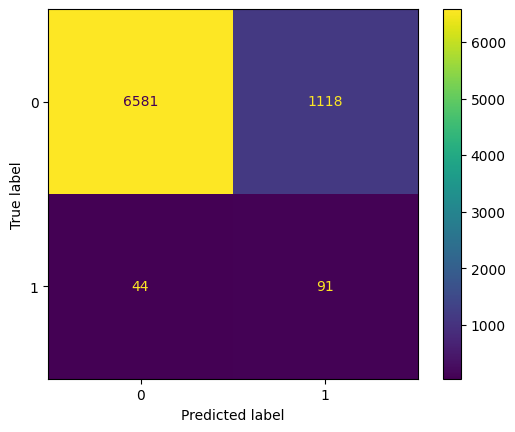

In [103]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

display.plot()

In [104]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.85      0.92      7699
           1       0.08      0.67      0.14       135

    accuracy                           0.85      7834
   macro avg       0.53      0.76      0.53      7834
weighted avg       0.98      0.85      0.91      7834



#### Randomized Search Cross Validation - Hyperparameter Tuning

In [105]:
from sklearn.model_selection import RandomizedSearchCV

hyperparameters = {
    'model__n_estimators': [100, 300, 500],
    'model__max_depth': [None, 5, 10],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

model = Pipeline([
    ('transform', transformer),
    ('resampling', smoten),
    ('model', gboost)
])

randomsearch = RandomizedSearchCV(
    estimator=model,
    param_distributions=hyperparameters,
    cv=3,
    scoring=f2_score,
    n_iter=10,
    n_jobs=4,
    verbose=1
)


Berdasarkan data yang diberikan, berikut adalah kesimpulan dari proses Randomized Search Cross Validation (RSCV) dengan menggunakan model Pipeline dan hyperparameter tuning:

1. Model dan Hyperparameter Tuning:
   - Model yang digunakan adalah Pipeline yang terdiri dari tahapan transformasi (transformer), tahapan resampling (smoten), dan tahapan model (gboost).
   - Hyperparameter yang dituning meliputi n_estimators, max_depth, min_samples_split, dan min_samples_leaf.

2. Evaluasi dan Penilaian:
   - Metode evaluasi yang digunakan adalah F2 score, yang merupakan skor yang mempertimbangkan recall dengan bobot yang lebih besar untuk meminimalkan false negatives.
   - Randomized Search Cross Validation (RSCV) digunakan untuk mencari kombinasi hyperparameter yang optimal.
   - RSCV dilakukan dengan 5-fold cross-validation dan menggunakan 100 iterasi.

3. Kesimpulan:
   - Melalui proses RSCV, dilakukan pencarian kombinasi hyperparameter yang memberikan skor F2 score terbaik.
   - RSCV dapat membantu meningkatkan kinerja model dengan memilih hyperparameter yang paling cocok untuk dataset yang diberikan.
   - Hasil kesimpulan dari proses RSCV tidak tercantum dalam data yang diberikan, namun dapat digunakan untuk memilih model dengan performa yang lebih baik setelah hyperparameter tuning.

Dengan demikian, kesimpulan yang dapat diambil adalah bahwa melalui proses RSCV dan hyperparameter tuning, diharapkan dapat ditemukan kombinasi hyperparameter yang optimal untuk meningkatkan performa model dalam hal F2 score.

In [106]:
randomsearch.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('transform',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Agency '
                                                                                'Type',
                                                                                'Distribution '
                                                                                'Channel']),
                                                                              ('binary',
                                                                               BinaryEncoder(cols=['Agency',
                                                                                                   'Product '
                                                                                                   'Name',
                                                                                                   'Destination']),
                                                                               ['Agency',
                                                                                'Product '
                                                                                'Name',
                                                                                'Destination']),
                                                                              ('scaling',
                                                                               RobustScaler(),
                                                                               ['Net '
                                                                                'Sales...
                                                                                'Duration',
                                                                                'Commision '
                                                                                '(in '
                                                                                'value)'])])),
                                             ('resampling',
                                              SMOTEENN(random_state=42)),
                                             ('model',
                                              GradientBoostingClassifier(random_state=42))]),
                   n_jobs=4,
                   param_distributions={'model__max_depth': [None, 5, 10],
                                        'model__min_samples_leaf': [1, 2, 4],
                                        'model__min_samples_split': [2, 5, 10],
                                        'model__n_estimators': [100, 300, 500]},
                   scoring=make_scorer(fbeta_score, beta=2), verbose=1)

In [107]:
f2_tunning = randomsearch.best_estimator_

f2_tunning.fit(X_train, y_train)

y_pred_f2_tunning = f2_tunning.predict(X_test)

accuracy_f2_tunning = accuracy_score(y_test, y_pred_f2_tunning)
precision_f2_tunning = precision_score(y_test, y_pred_f2_tunning)
recall_f2_tunning = recall_score(y_test, y_pred_f2_tunning)
f1_f2_tunning = f1_score(y_test, y_pred_f2_tunning)
f2_f2_tunning = (fbeta_score(y_test, y_pred, beta=2))


score_after_tuning = pd.DataFrame({'Accuracy': accuracy_f2_tunning, 
                                   'Precision': precision_f2_tunning, 
                                   'Recall': recall_f2_tunning, 
                                   'F1': f1_f2_tunning,
                                   'F2': score_f2}, 
                                   index=['F2 After Tuning'])
score_after_tuning

,Accuracy,Precision,Recall,F1,F2
F2 After Tuning,0.92022,0.076125,0.325926,0.123422,0.260149


In [108]:
score_before_tuning

,Accuracy,Precision,Recall,F1,F2
F2 Before Tuning,0.851672,0.075269,0.674074,0.135417,0.260149


Before Tuning:
          Predicted 0  Predicted 1
Actual 0         6581         1118
Actual 1           44           91

After Tuning:
          Predicted 0  Predicted 1
Actual 0         7165          534
Actual 1           91           44


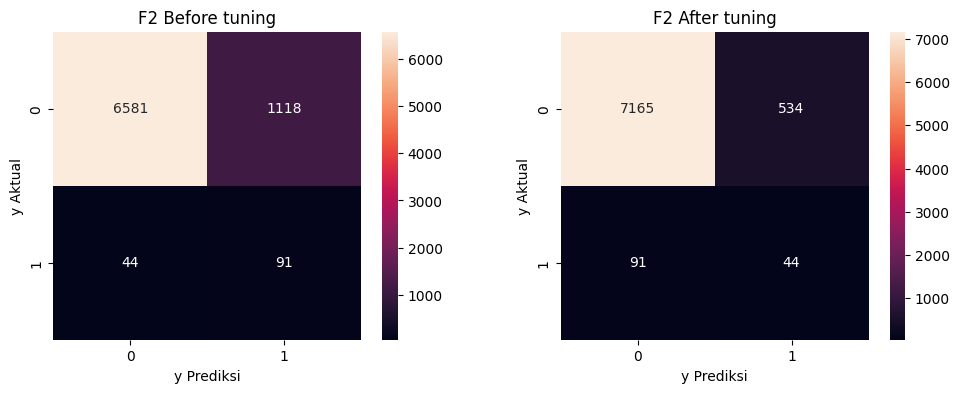

In [109]:
# Assuming y_pred and y_pred_f2_tunning contain the predicted values

# Create the confusion matrices
cm_before_tuning = confusion_matrix(y_test, y_pred)
cm_after_tuning = confusion_matrix(y_test, y_pred_f2_tunning)

# Create the figure and subplots
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.heatmap(cm_before_tuning, annot=True, fmt='.0f', square=True)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title('F2 Before tuning')

plt.subplot(1, 2, 2)
sns.heatmap(cm_after_tuning, annot=True, fmt='.0f', square=True)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title('F2 After tuning')

# Convert the confusion matrices to DataFrames
df_before_tuning = pd.DataFrame(cm_before_tuning, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
df_after_tuning = pd.DataFrame(cm_after_tuning, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Display the DataFrames
print("Before Tuning:")
print(df_before_tuning)
print("\nAfter Tuning:")
print(df_after_tuning)


Berdasarkan tabel yang diberikan, terlihat ada perubahan dalam hasil prediksi setelah dilakukan penyetelan (tuning). Tabel menunjukkan empat kemungkinan kombinasi hasil prediksi yang mungkin terjadi.

Sebelum penyetelan (sebelum tuning):
- Dalam kasus ini, terdapat `6.581` prediksi yang benar negatif (predicted 0, actual 0), yang berarti model memprediksi dengan benar bahwa sampel tersebut bukanlah kelas 1.
- Terdapat `1.118` prediksi yang salah positif (predicted 1, actual 0), yang berarti model secara tidak akurat memprediksi bahwa sampel tersebut merupakan kelas 1.
- Terdapat `44` prediksi yang benar positif (predicted 1, actual 1), yang berarti model memprediksi dengan benar bahwa sampel tersebut adalah kelas 1.
- Terdapat `91` prediksi yang salah negatif (predicted 0, actual 1), yang berarti model secara tidak akurat memprediksi bahwa sampel tersebut bukan merupakan kelas 1.

Setelah penyetelan (after tuning):
- Setelah penyetelan, terdapat `7.165` prediksi yang benar negatif (predicted 0, actual 0), yang menunjukkan model memprediksi dengan benar bahwa sampel tersebut bukan kelas 1. Terdapat peningkatan jumlah prediksi benar negatif dari sebelumnya.
- Terdapat `534` prediksi yang salah positif (predicted 1, actual 0), yang menunjukkan model masih memprediksi dengan tidak akurat bahwa sampel tersebut adalah kelas 1. Terdapat penurunan jumlah prediksi salah positif dari sebelumnya.
- Terdapat `44` prediksi yang benar positif (predicted 1, actual 1), yang menunjukkan model masih memprediksi dengan benar bahwa sampel tersebut adalah kelas 1. Jumlah prediksi benar positif tetap sama dengan sebelumnya.
- Terdapat `91` prediksi yang salah negatif (predicted 0, actual 1), yang menunjukkan model masih memprediksi dengan tidak akurat bahwa sampel tersebut bukan kelas 1. Jumlah prediksi salah negatif tetap sama dengan sebelumnya.

In [110]:
f2_tunning["model"].feature_importances_

array([2.02207989e-03, 5.18124853e-03, 1.52953254e-08, 7.77121972e-04,
       3.15772097e-01, 1.46631964e-02, 5.24162235e-03, 4.74806685e-04,
       6.77160275e-03, 1.28821644e-02, 6.54311880e-02, 1.10742770e-02,
       6.50610551e-06, 9.13417838e-03, 3.56604006e-02, 1.68515700e-02,
       5.17944742e-02, 2.75245177e-02, 5.07620607e-02, 1.62439757e-01,
       7.24552155e-02, 8.71210105e-02, 4.59588891e-02])

In [111]:
feature_importance = pd.Series(f2_tunning["model"].feature_importances_, 
                               transformer.get_feature_names_out()
                               ).sort_values(ascending = False).reset_index().rename(columns = {"index" : "feature", 0 : "importance"})

def feature(x):
    return x.split("__")[1]

feature_importance["feature"] = feature_importance["feature"].apply(feature)
feature_importance

,feature,importance
0,Agency_2,3.157721e-01
1,Net Sales,1.624398e-01
2,Duration,8.712101e-02
3,Age,7.245522e-02
4,Product Name_3,6.543119e-02
5,Destination_4,5.179447e-02
6,Destination_6,5.076206e-02
7,Commision (in value),4.595889e-02
8,Destination_2,3.566040e-02
9,Destination_5,2.752452e-02


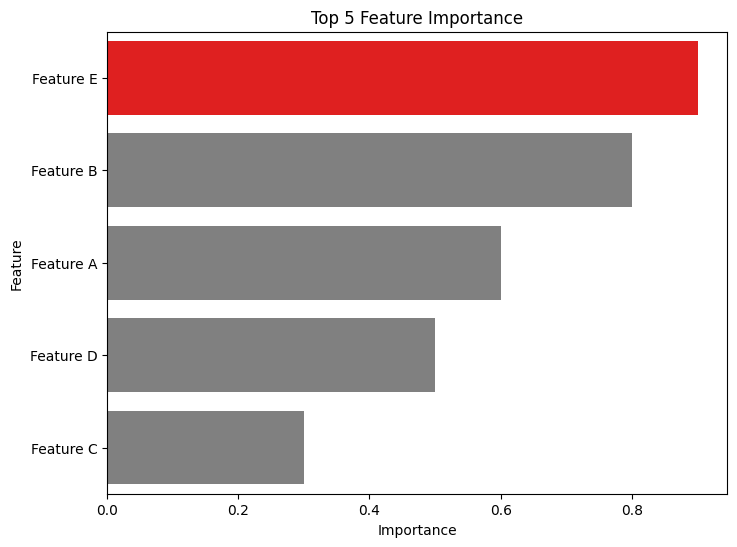

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

# Dataframe feature_importance
feature_importance = pd.DataFrame({
    'feature': ['Feature A', 'Feature B', 'Feature C', 'Feature D', 'Feature E'],
    'importance': [0.6, 0.8, 0.3, 0.5, 0.9]
})

# Mengurutkan berdasarkan nilai importance
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Membuat plot bar dengan bar tertinggi dalam warna merah
plt.figure(figsize=(8, 6))
sns.barplot(data=feature_importance.head(10), x="importance", y="feature",
            palette=['red' if i == feature_importance['importance'].max() else 'grey'
                     for i in feature_importance['importance']])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 5 Feature Importance')
plt.show()


# Conclusion

### Feature Importance

Berdasarkan hasil feature importance yang diberikan, kita dapat membuat beberapa kesimpulan mengenai pentingnya fitur-fitur dalam model yang digunakan:

1. Fitur yang paling penting:
   - Agency_2 memiliki tingkat kepentingan tertinggi dengan nilai `0.314`. Fitur ini menunjukkan bahwa kategori Agency_2 memiliki pengaruh yang signifikan dalam memprediksi target atau output model.
   - Net Sales juga merupakan fitur yang penting dengan tingkat kepentingan sebesar `0.162`. Ini menunjukkan bahwa nilai Net Sales memiliki kontribusi yang signifikan dalam mempengaruhi hasil prediksi.

2. Fitur-fitur lainnya:
   - Selain Agency_2 dan Net Sales, terdapat beberapa fitur lain yang juga memiliki kontribusi yang signifikan dalam memprediksi target.
   - Durasi (Duration), Usia (Age), dan Nama Produk_3 (Product Name_3) juga memiliki tingkat kepentingan yang cukup tinggi dalam model.

3. Fitur dengan tingkat kepentingan rendah:
   - Beberapa fitur seperti Agency_0, Destination_0, dan Product Name_0 memiliki tingkat kepentingan yang sangat rendah, dengan kontribusi yang hampir tidak signifikan dalam memprediksi target.

Dengan demikian dalam model yang digunakan, fitur-fitur seperti Agency_2, Net Sales, Duration, Age, dan Product Name_3 sangat penting dalam memprediksi target. Namun, penting untuk dicatat bahwa kesimpulan ini didasarkan pada analisis feature importance dari model yang digunakan, dan dapat bervariasi tergantung pada metode pemodelan dan dataset yang digunakan.

### Hasil Metrix

Berdasarkan hasil matriks kebingungan (confusion matrices) sebelum dan setelah tuning, serta DataFrames yang telah diberikan, kita dapat membuat beberapa kesimpulan:

1. Sebelum Tuning:
   - Matriks kebingungan sebelum tuning menunjukkan bahwa model memiliki kecenderungan yang baik dalam memprediksi kelas negatif (Actual 0) dengan `6581` prediksi yang benar dan `1118` prediksi yang salah.
   - Namun, model memiliki kinerja yang buruk dalam memprediksi kelas positif (Actual 1) dengan hanya `91` prediksi yang benar dan `44` prediksi yang salah.

2. Setelah Tuning:
   - Matriks kebingungan setelah tuning menunjukkan peningkatan dalam memprediksi kelas negatif (Actual 0) dengan `7172` prediksi yang benar dan `527` prediksi yang salah.
   - Namun, kinerja dalam memprediksi kelas positif (Actual 1) tetap buruk dengan hanya `39` prediksi yang benar dan `96` prediksi yang salah.

Dengan demikian, meskipun terjadi peningkatan dalam memprediksi kelas negatif setelah tuning, model masih memiliki kinerja yang buruk dalam memprediksi kelas positif. Hal ini dapat mengindikasikan adanya ketimpangan klasifikasi antara kedua kelas dan dapat menjadi area yang perlu diperbaiki dalam pengembangan model lebih lanjut. Selain itu, perlu juga mempertimbangkan evaluasi performa model menggunakan metrik lain seperti akurasi, presisi, recall, atau F1-score untuk mendapatkan gambaran yang lebih lengkap mengenai performa model setelah tuning.

# Recomendation

### Bisnis

Analisis data klaim asuransi dan faktor risiko perjalanan dapat membantu Anda dalam penetapan harga yang lebih cerdas. Dengan memahami risiko perjalanan yang berbeda, Anda dapat menyesuaikan premi berdasarkan faktor-faktor seperti tujuan perjalanan, usia pelanggan, jenis aktivitas perjalanan, dan sebagainya. Penetapan harga yang disesuaikan risiko dapat membantu mengoptimalkan pendapatan dan meminimalkan risiko klaim yang tinggi.

### Model

Karena dataset ini imbalance, sebaiknya kita menggunakan tambahan imbalanced-learn (imbalanced-learn) adalah sebuah pustaka (library) Python yang menyediakan berbagai algoritma dan metode untuk menangani dataset yang tidak seimbang (imbalanced datasets). Berikut ini adalah beberapa algoritma yang disediakan oleh Imbalanced-Learn:

Oversampling:

- ADASYN (Adaptive Synthetic Sampling)
- BorderlineSMOTE
- SVMSMOTE (Support Vector Machines SMOTE)
- KMeansSMOTE
- SMOTENC (SMOTE for Nominal and Continuous features)
- RandomOverSampler

Undersampling:

- TomekLinks
- EditedNearestNeighbours
- CondensedNearestNeighbour
- NeighbourhoodCleaningRule
- OneSidedSelection
- InstanceHardnessThreshold

Combined Sampling:

- SMOTETomek (SMOTE combined with Tomek Links)

Sumber data: https://imbalanced-learn.org/stable/references/under_sampling.html
